<div class="alert alert-success">
    <h1 align="center">Personal Loan Model & EDA </h1>
    <h3 align="center">Seyed Ali Abolfazli </a></h3>
</div>

## Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and preprocessing tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss, roc_curve, auc

In [9]:
# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load data and initial check

In [16]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [18]:
# Display a few initial rows
print("Sample of the data:")
print(df.head())

Sample of the data:
   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [20]:
# Check overall information and data types
print("\nData Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB
None


In [22]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [24]:
# If there are missing values, check their percentage
missing_percent = df.isnull().mean() * 100
print("\nPercentage of Missing Values:")
print(missing_percent)


Percentage of Missing Values:
ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64


# 2. Statistical analysis and outlier detection

In [27]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.881000    56.498800       0.096000   
std       1.147663     0.839869   101.713802       0.294621   
min       1.000000     1.000000     0.000000   

In [39]:
df['CCAvg'] = df['CCAvg'].astype(str).str.replace('/', '.').astype(float)

In [41]:
# Plot various plots to check the distribution and outliers
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
target = 'Personal Loan'  # Our target variable

# 3. Plot six types of plots for each feature using loops

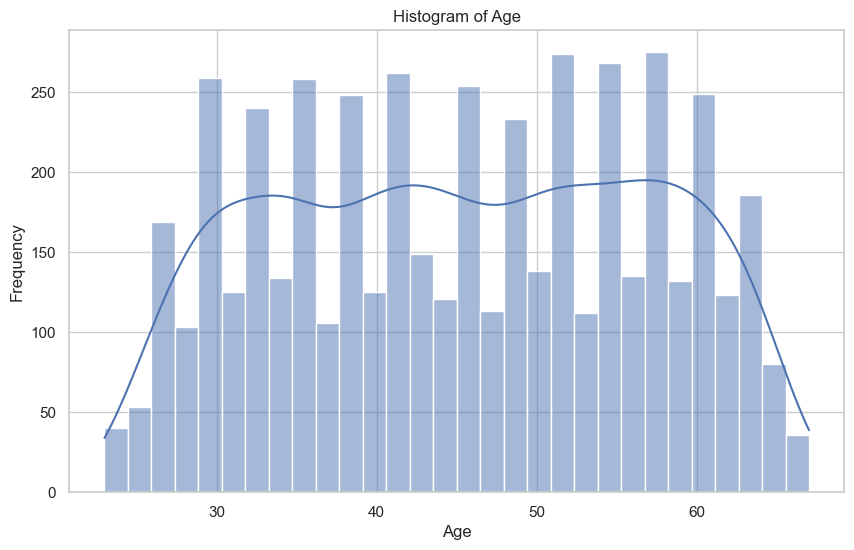

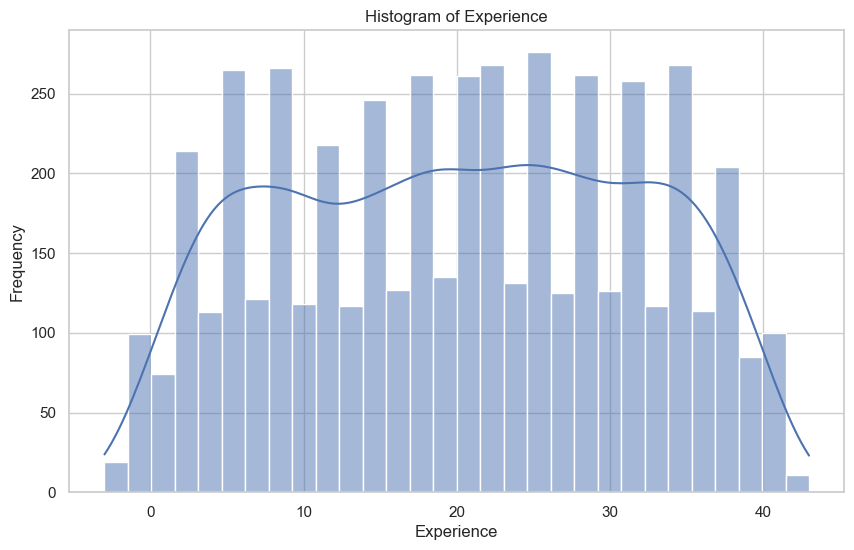

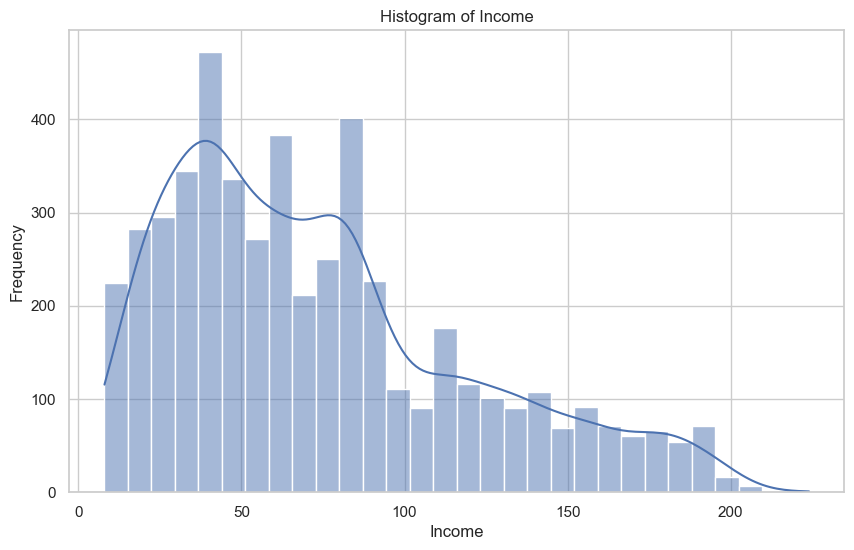

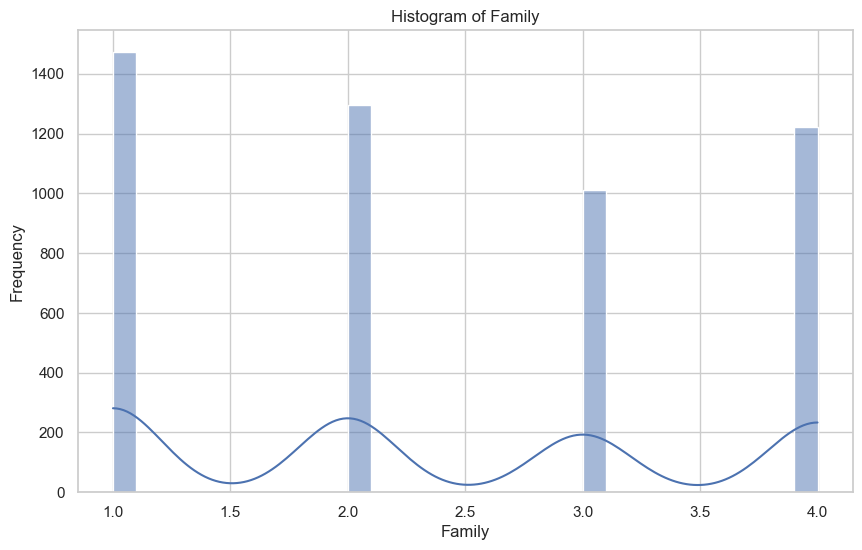

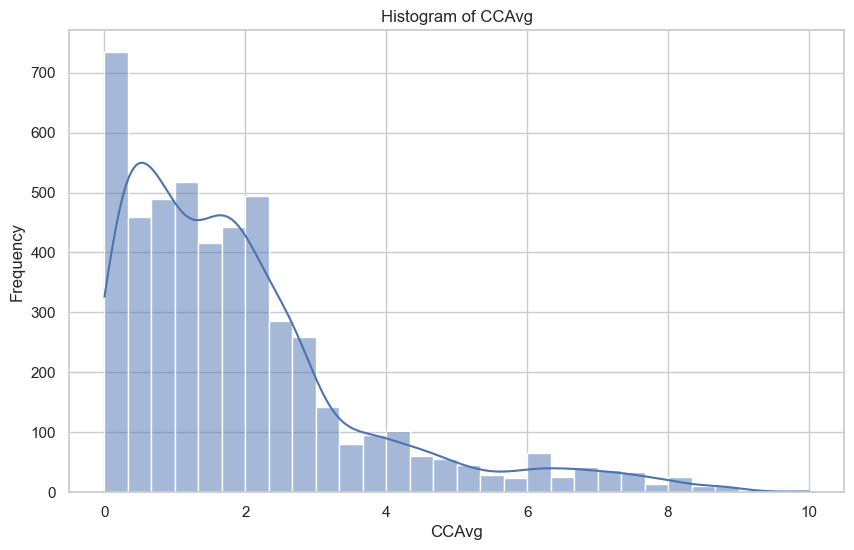

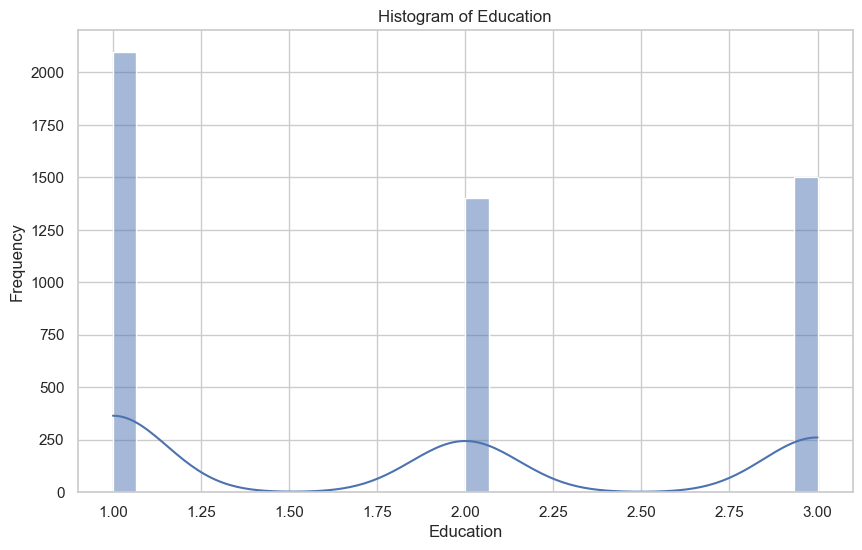

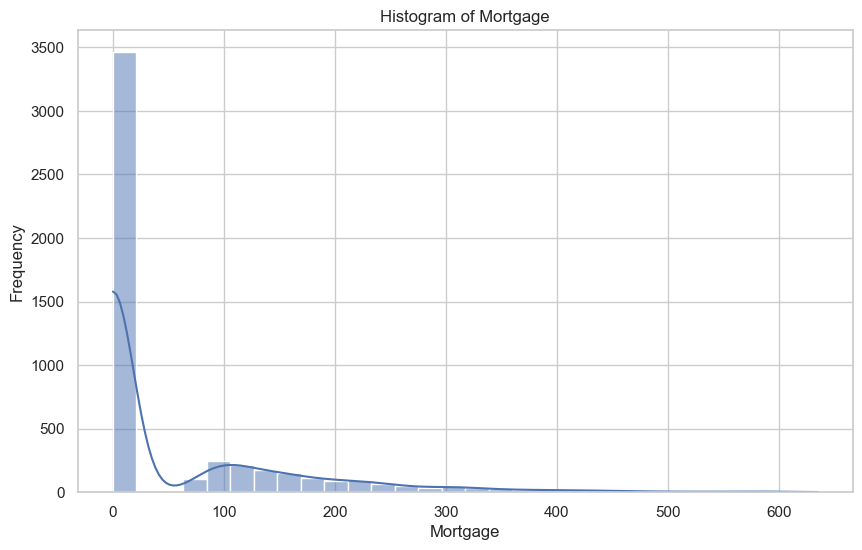

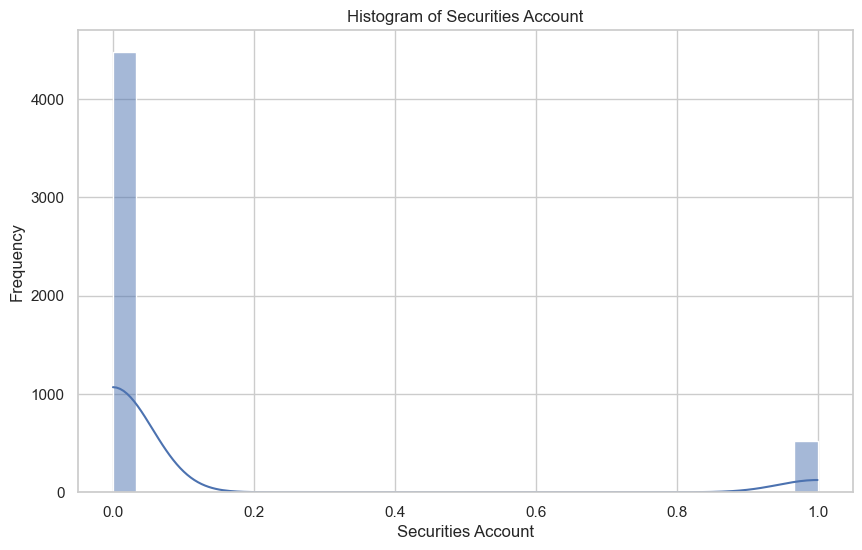

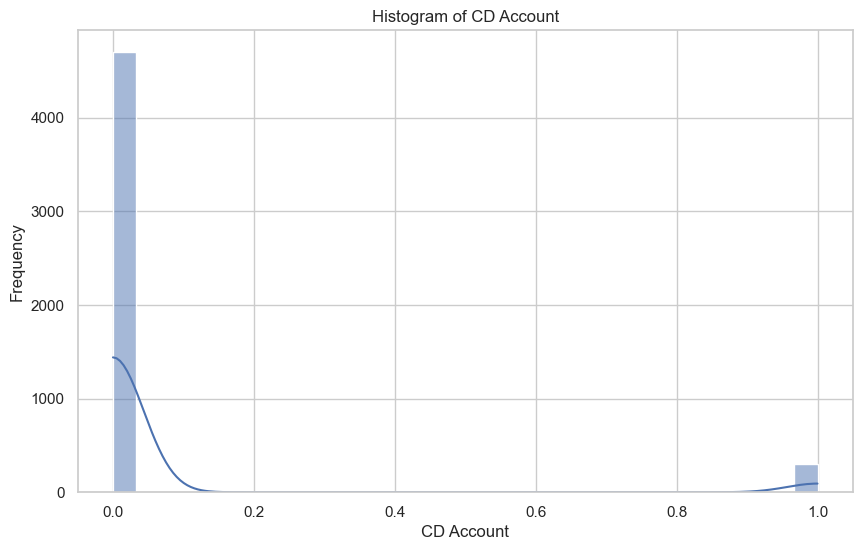

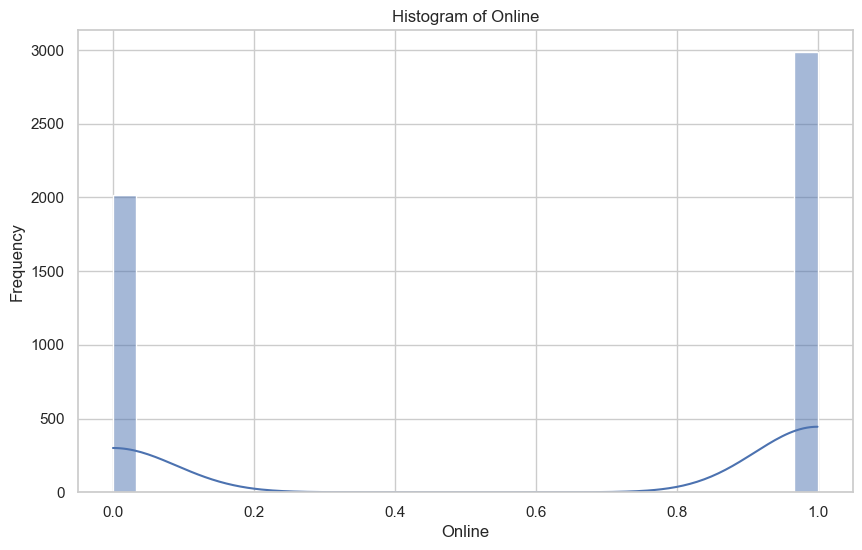

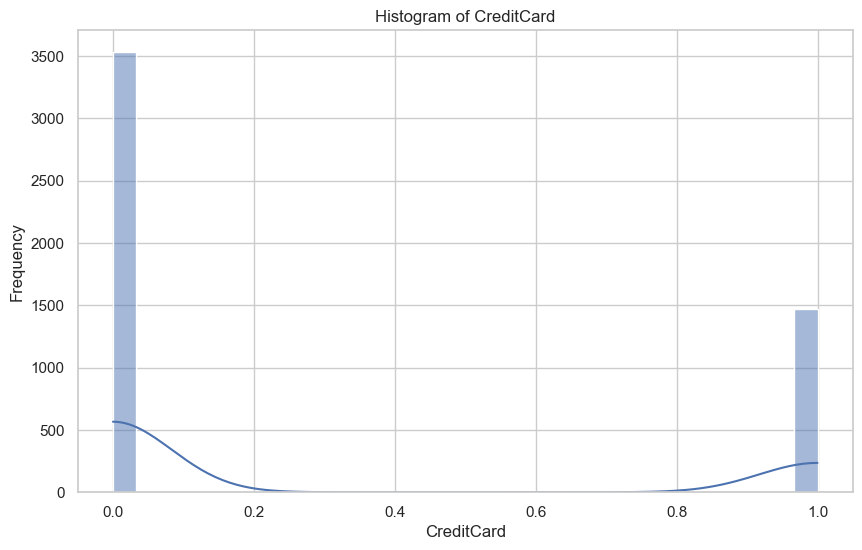

In [44]:
# Type 1: Histogram
for feature in features:
    plt.figure()
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

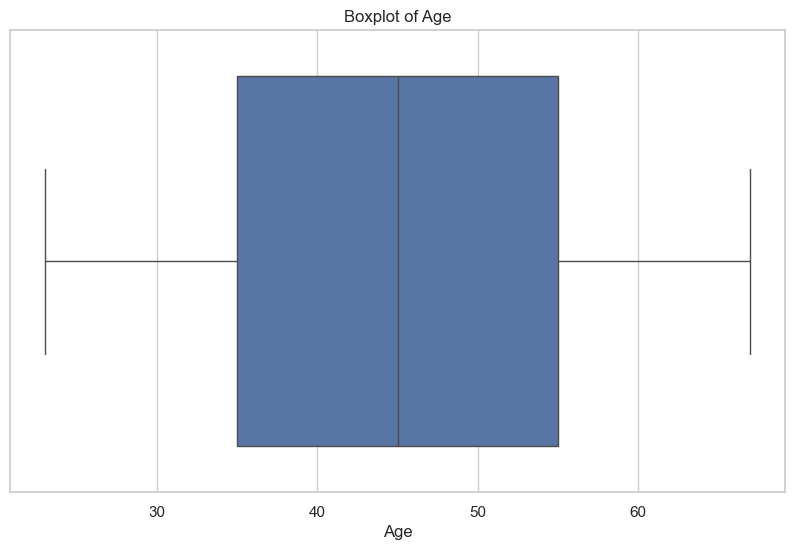

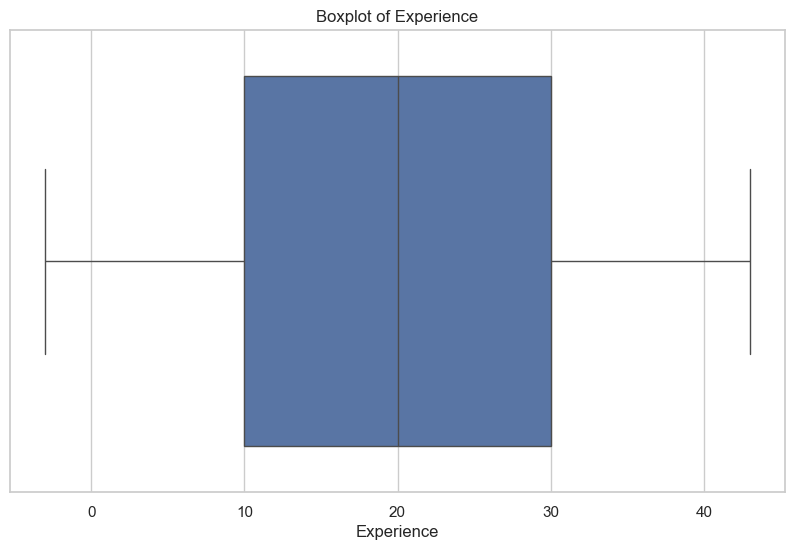

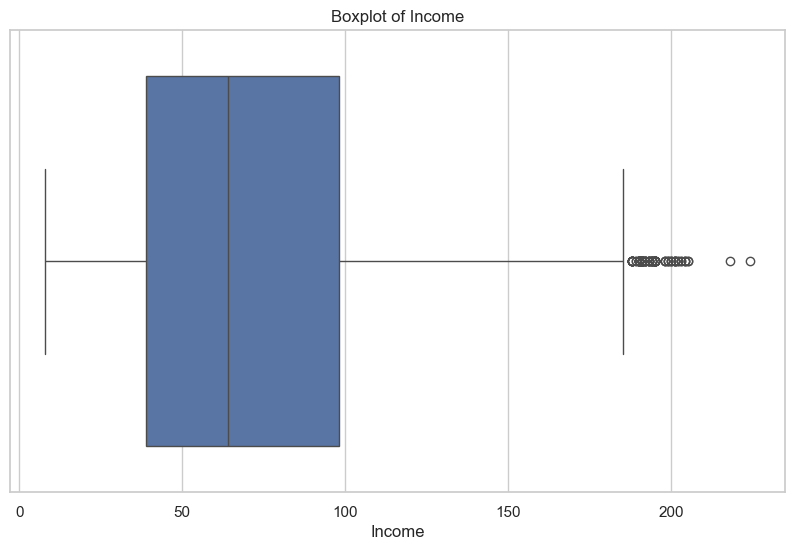

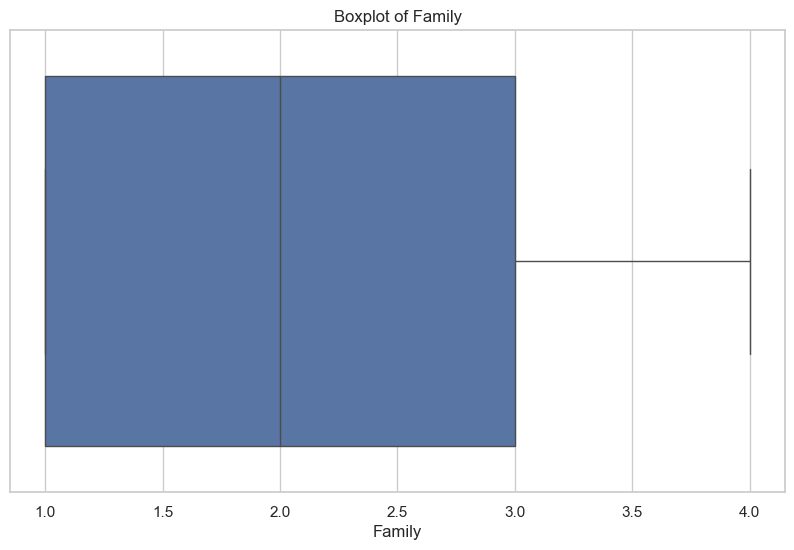

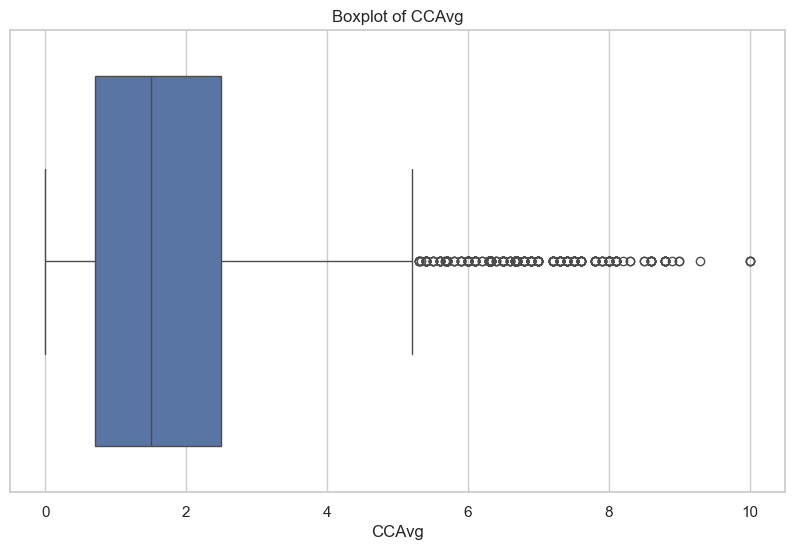

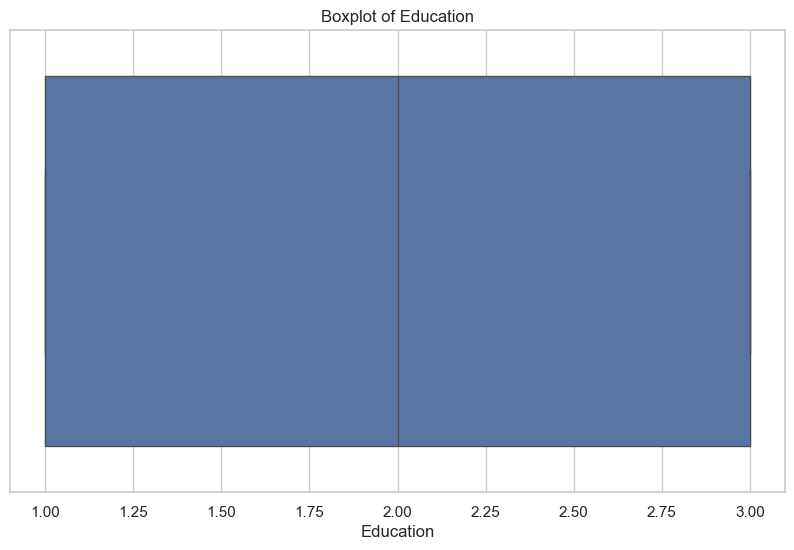

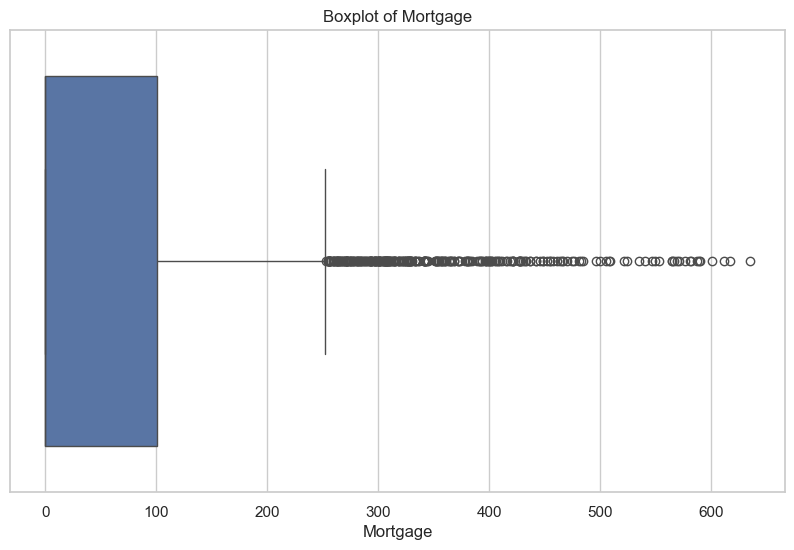

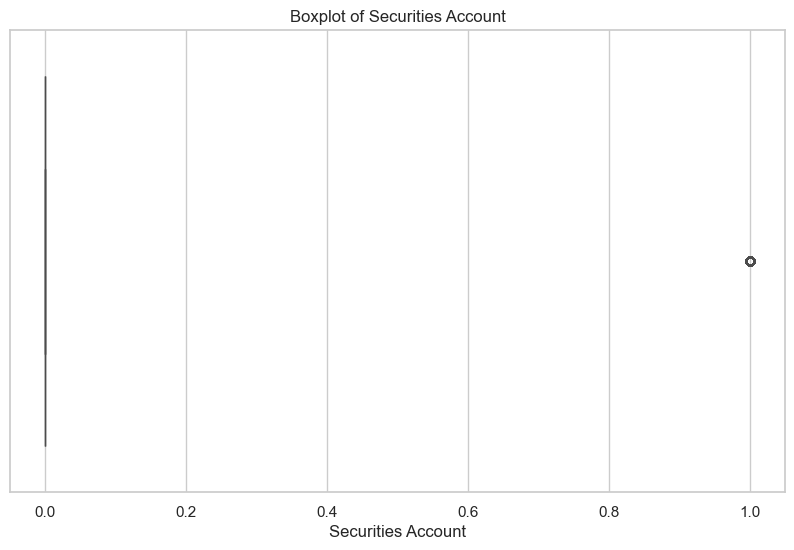

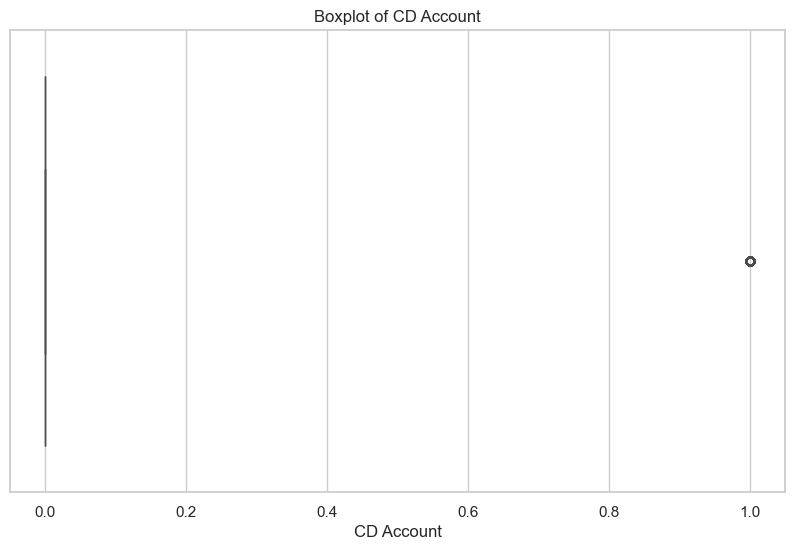

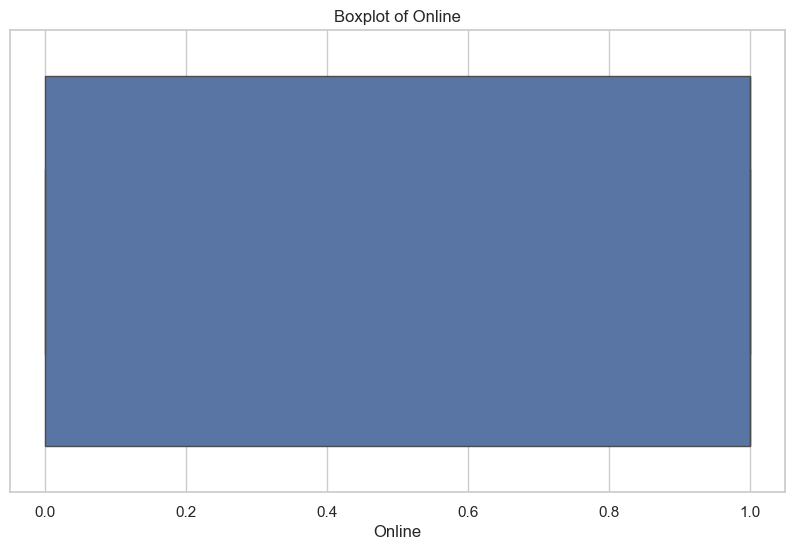

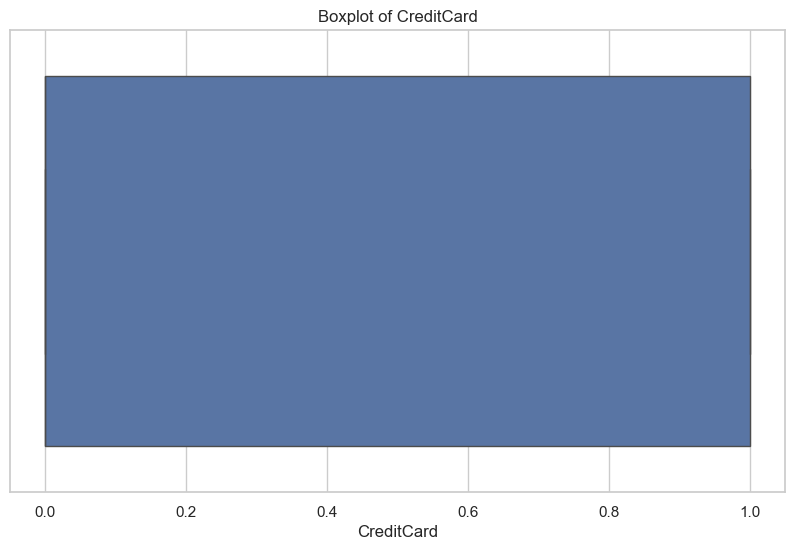

In [46]:
# Type 2: Boxplot
for feature in features:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

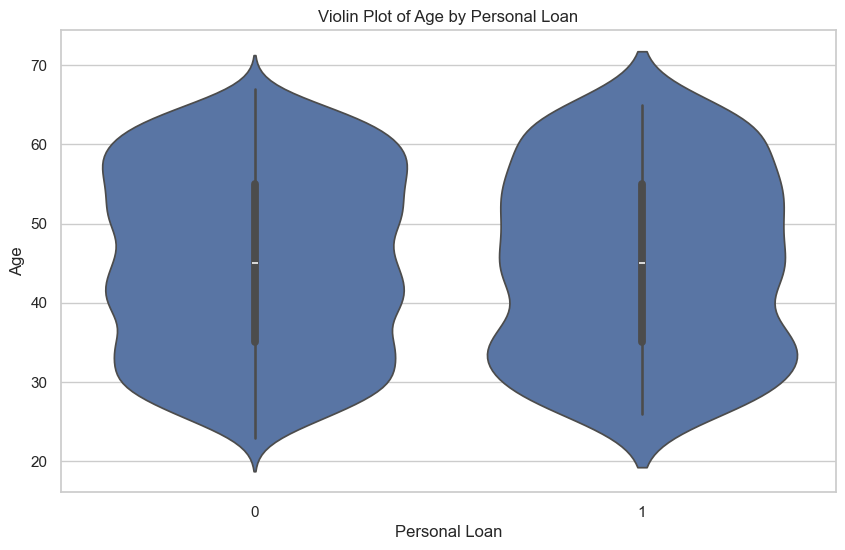

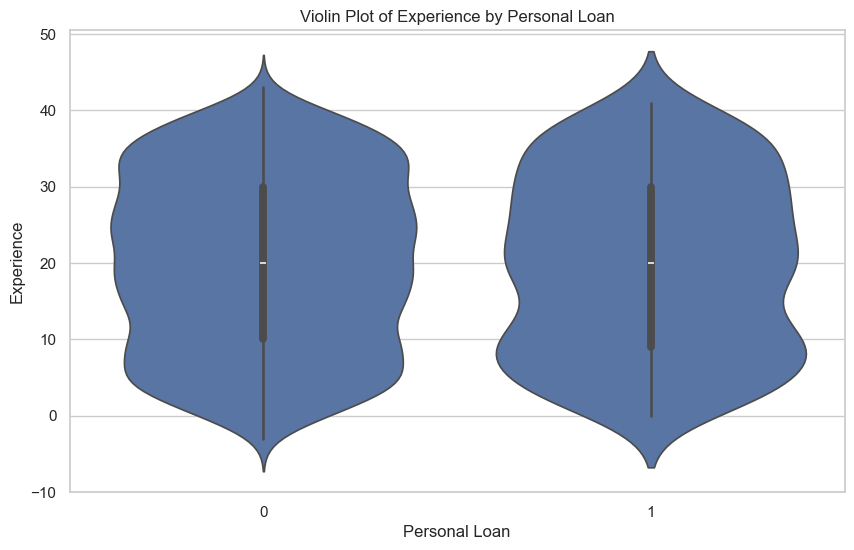

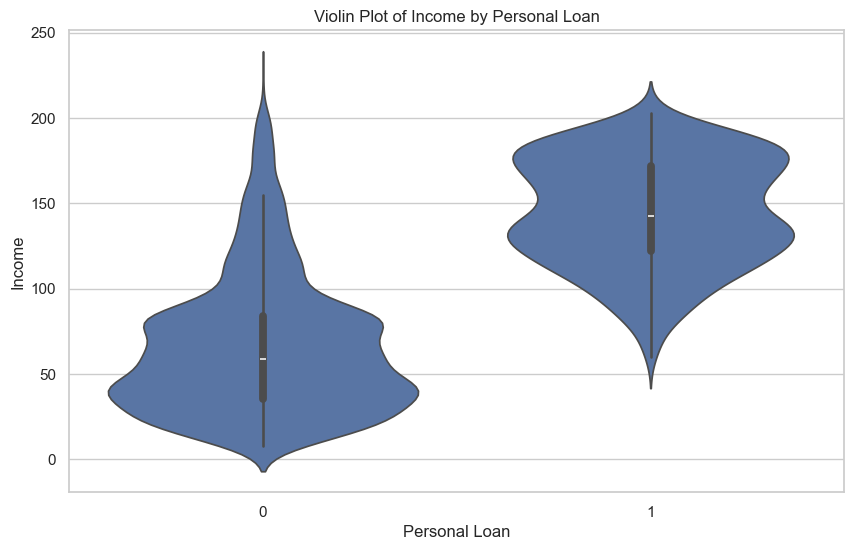

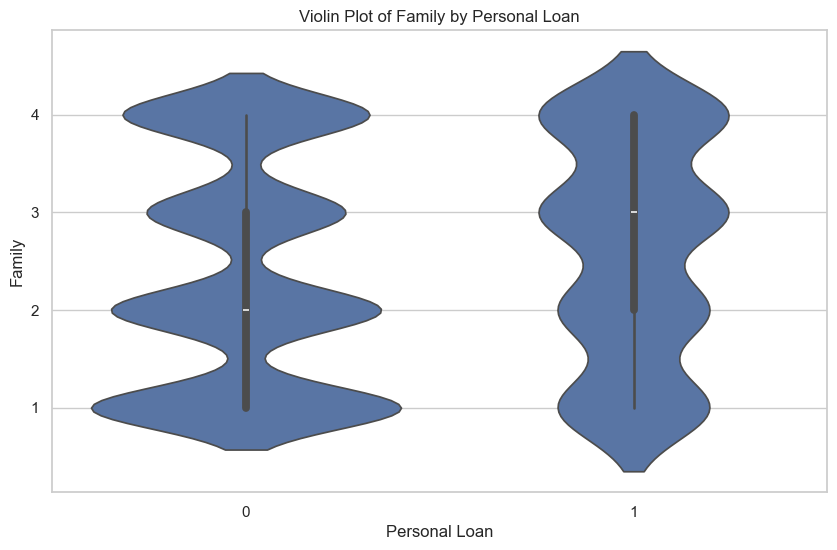

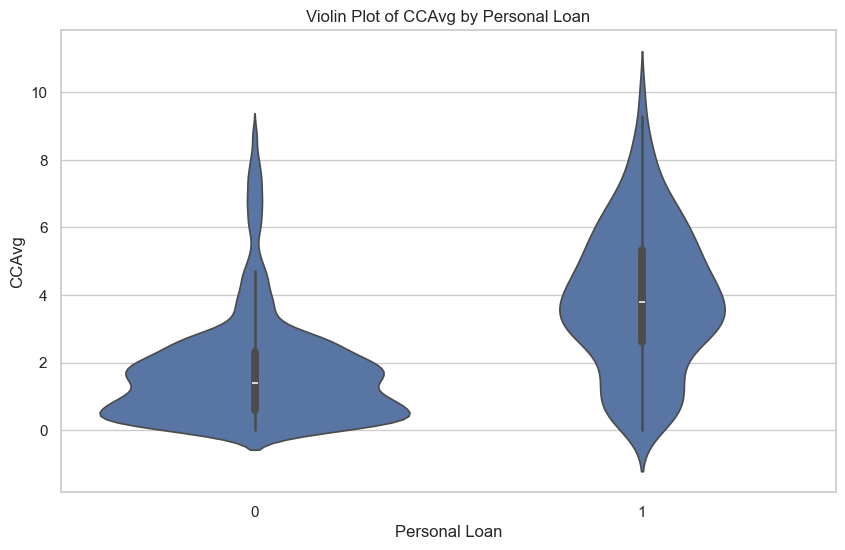

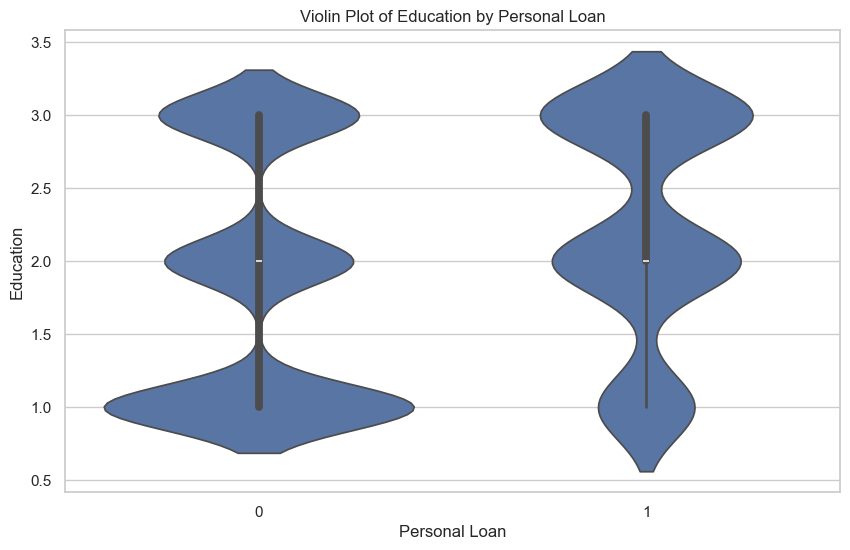

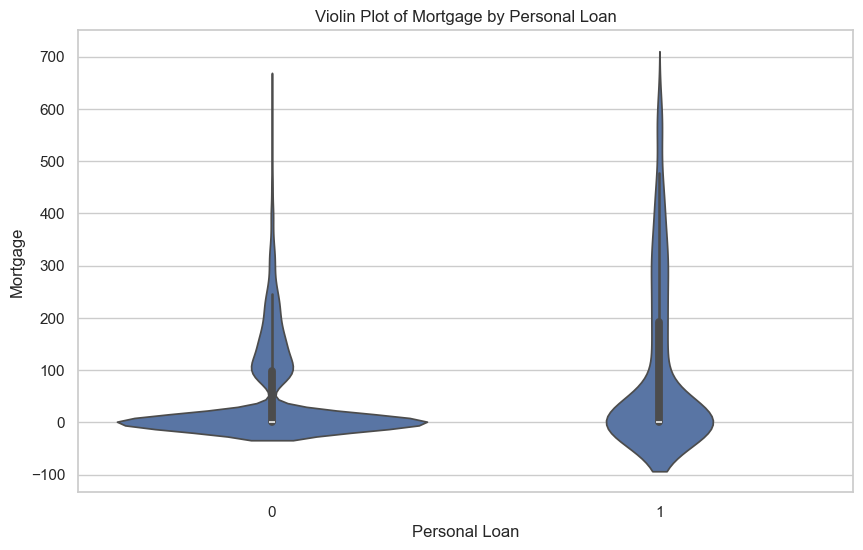

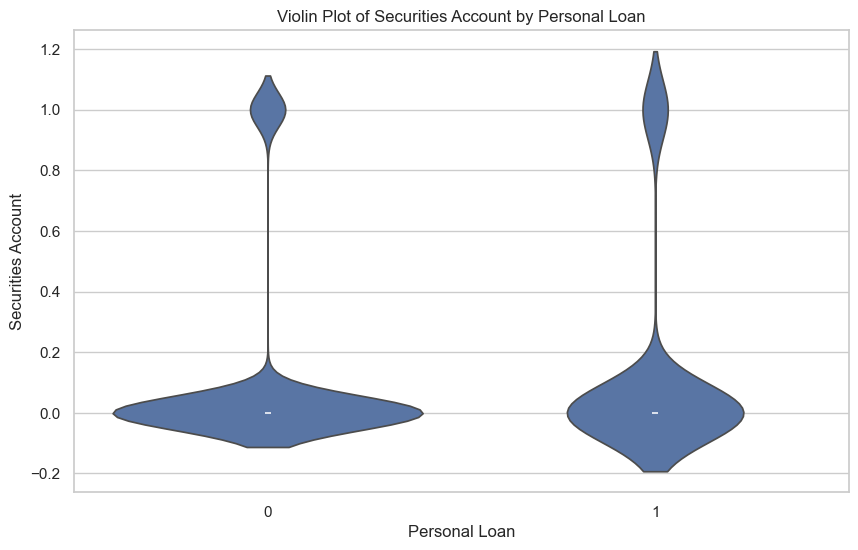

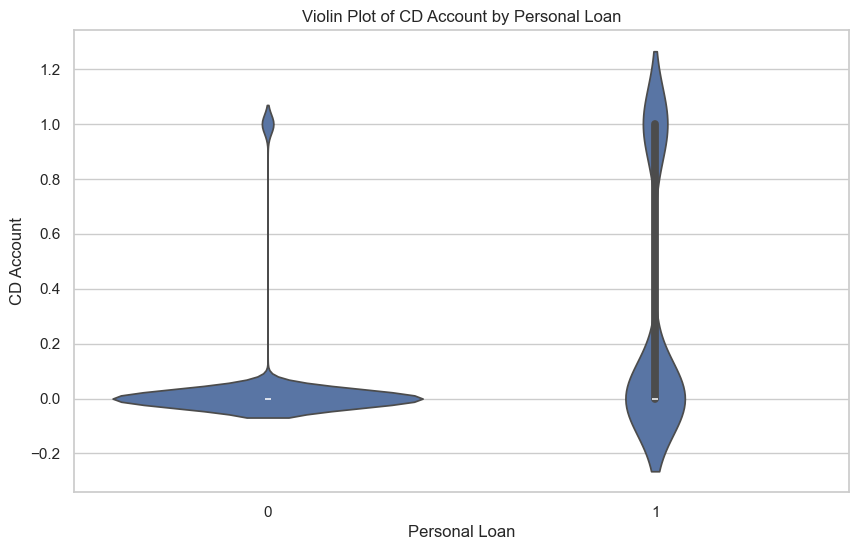

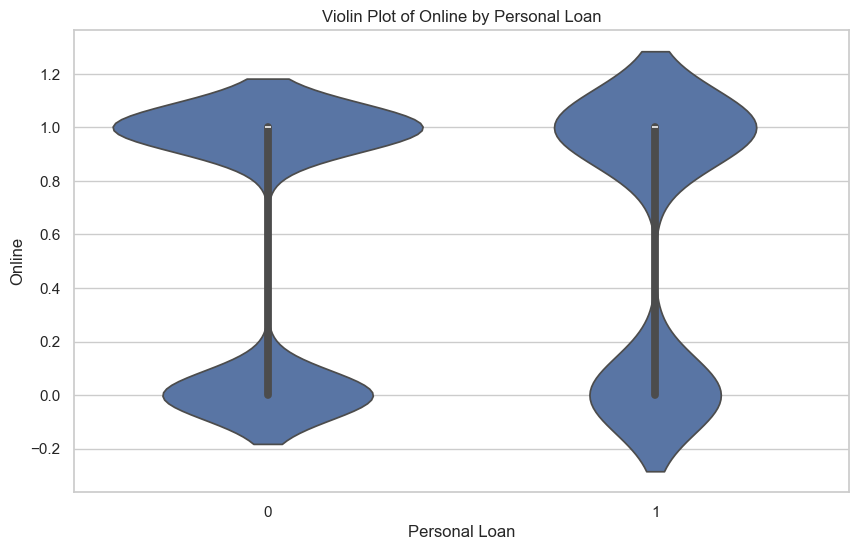

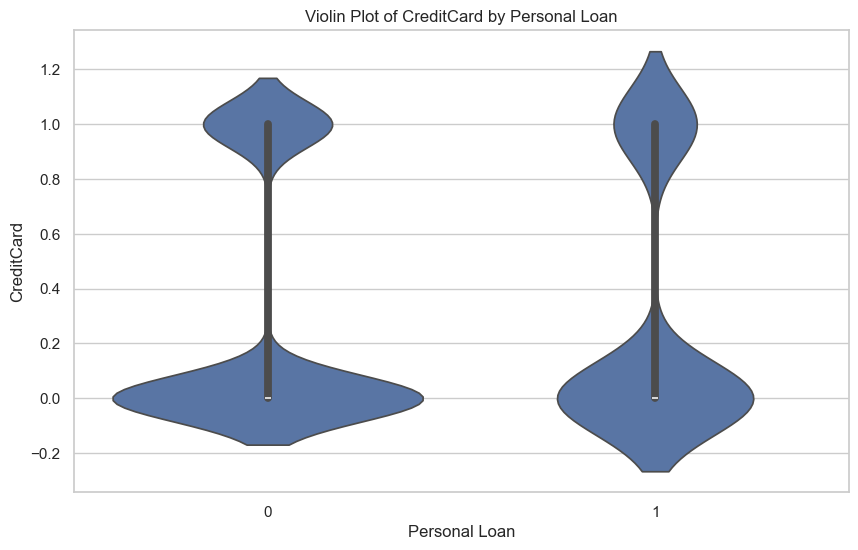

In [48]:
# Type 3: Violin Plot (to view distribution relative to target)
for feature in features:
    plt.figure()
    sns.violinplot(x=df[target], y=df[feature])
    plt.title(f'Violin Plot of {feature} by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

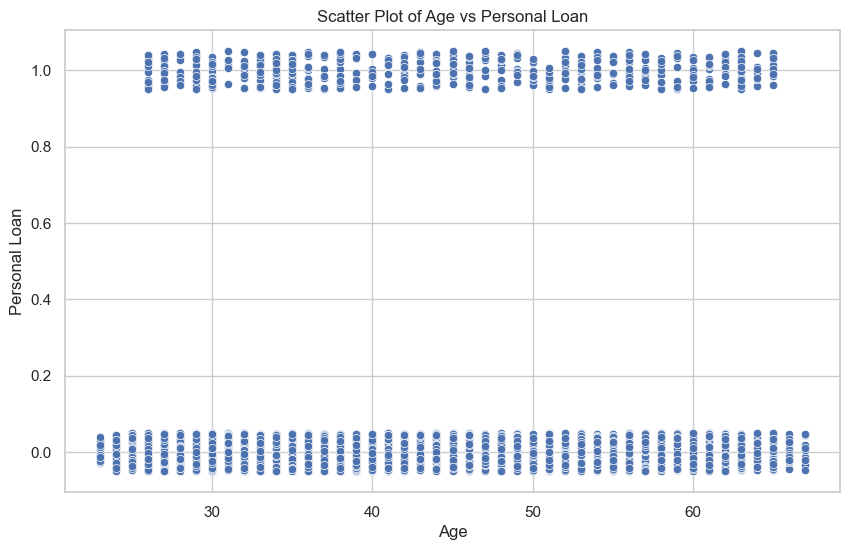

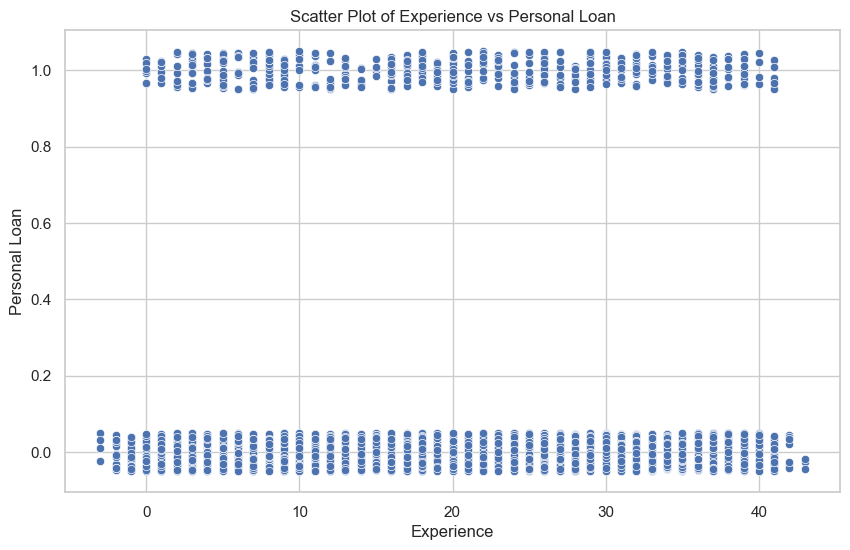

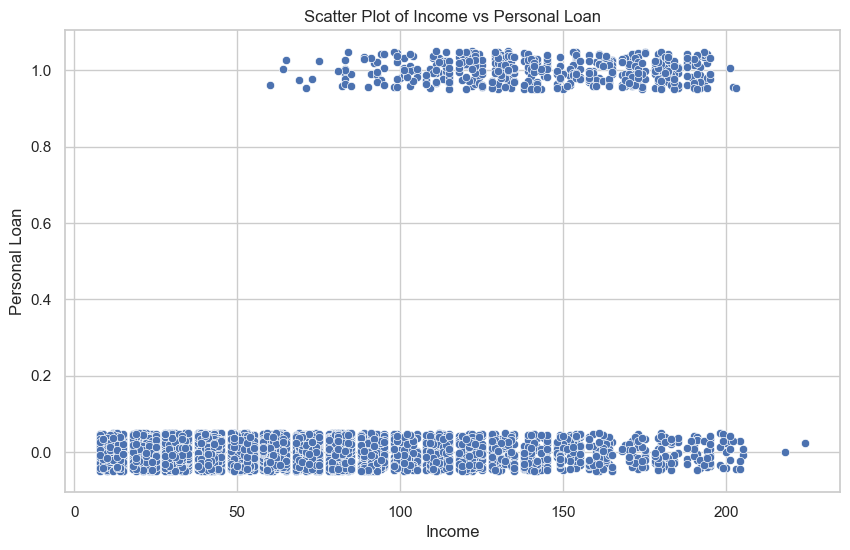

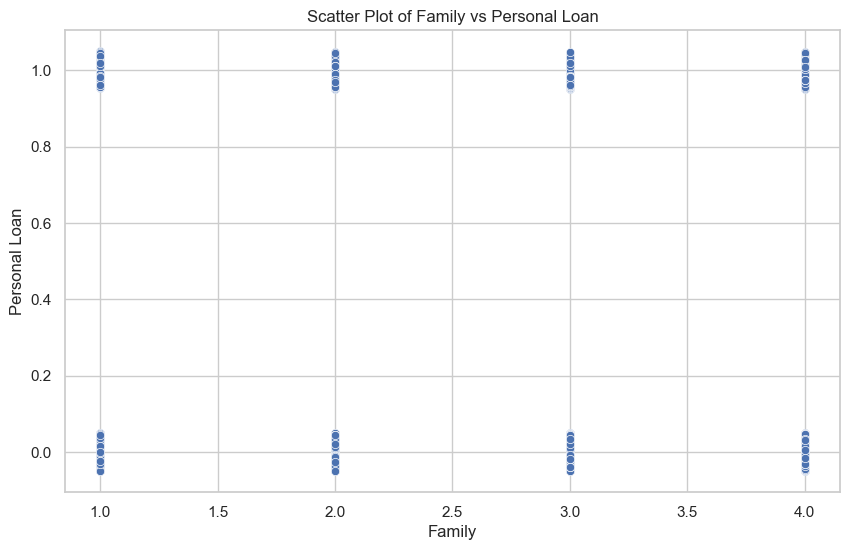

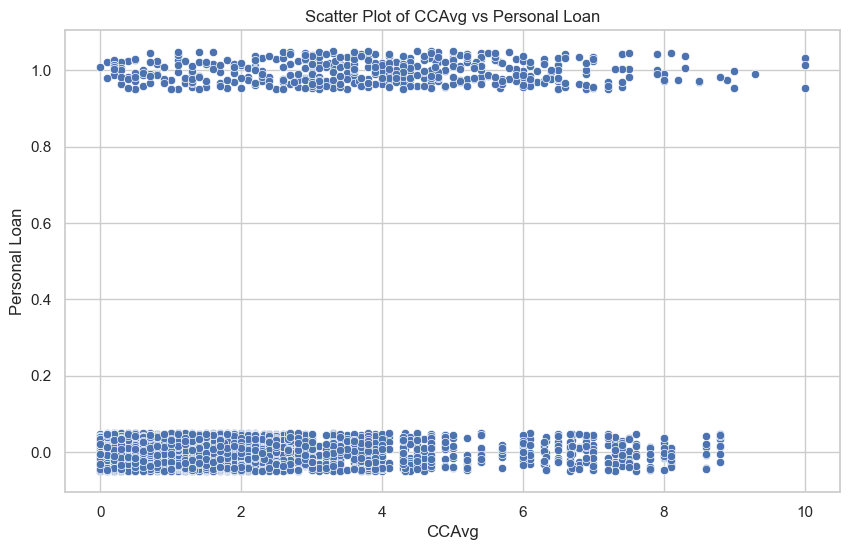

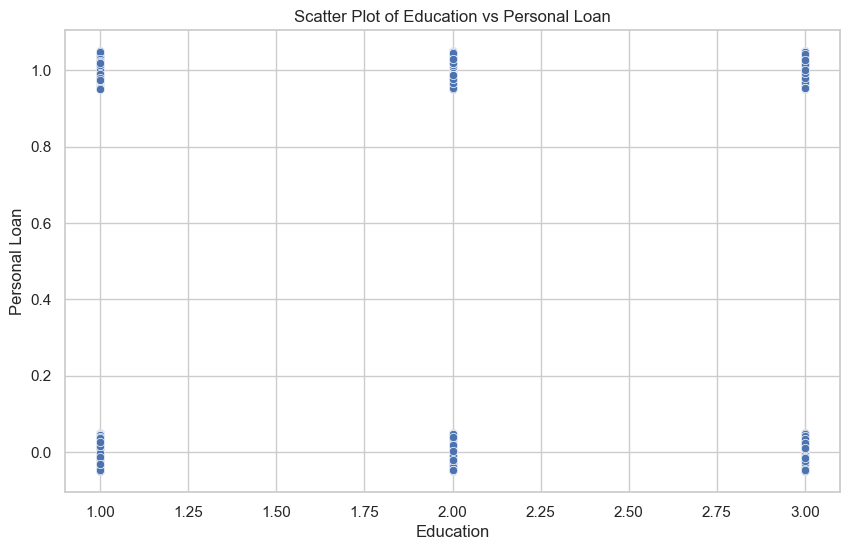

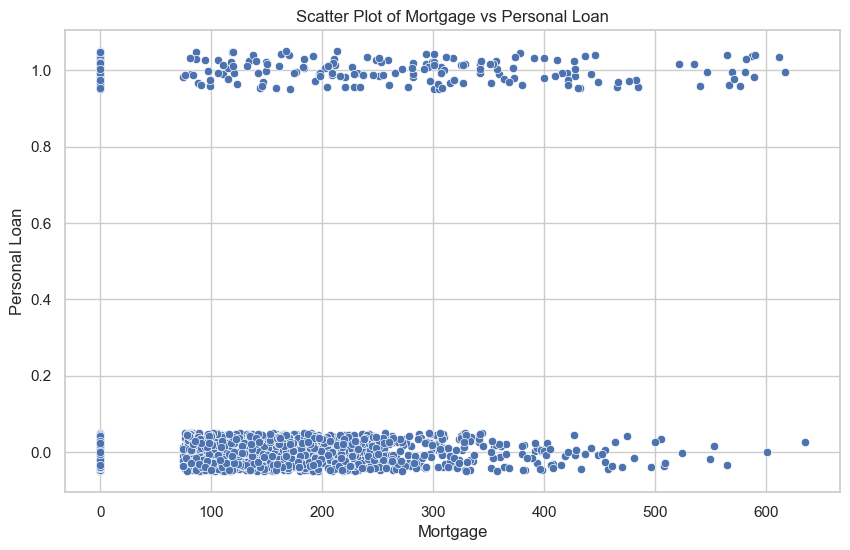

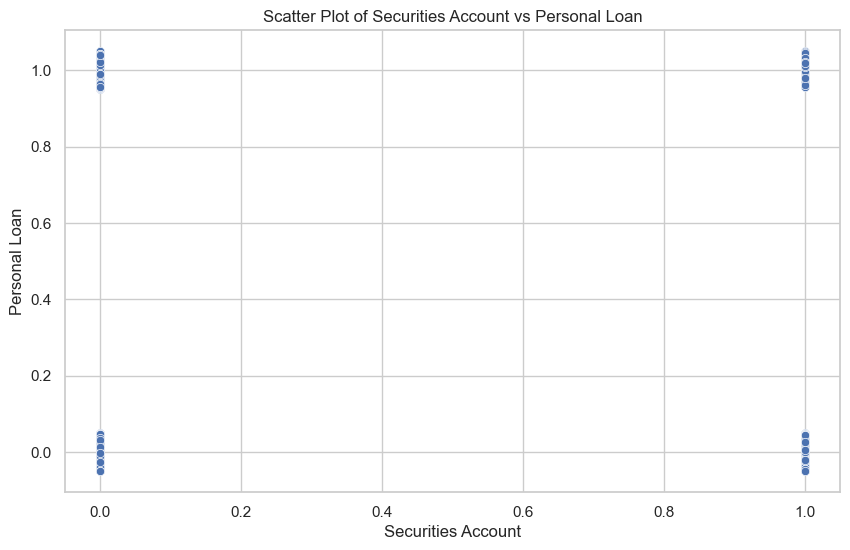

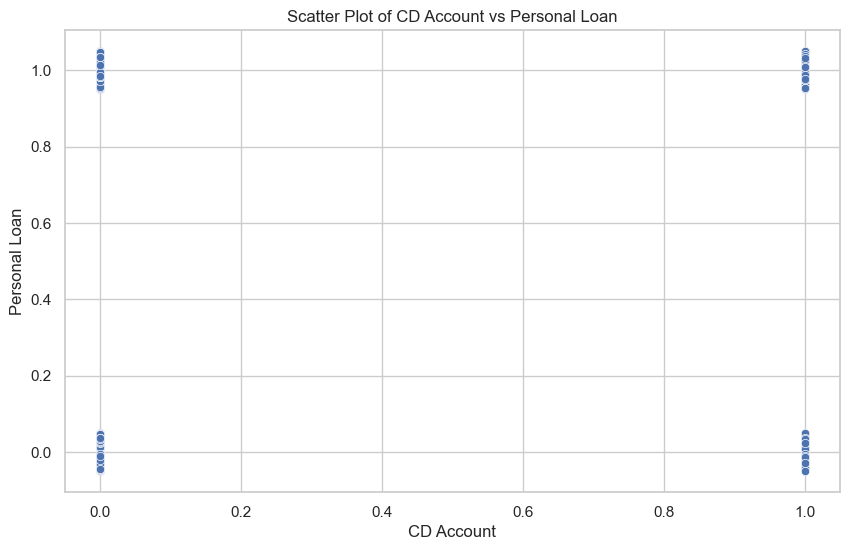

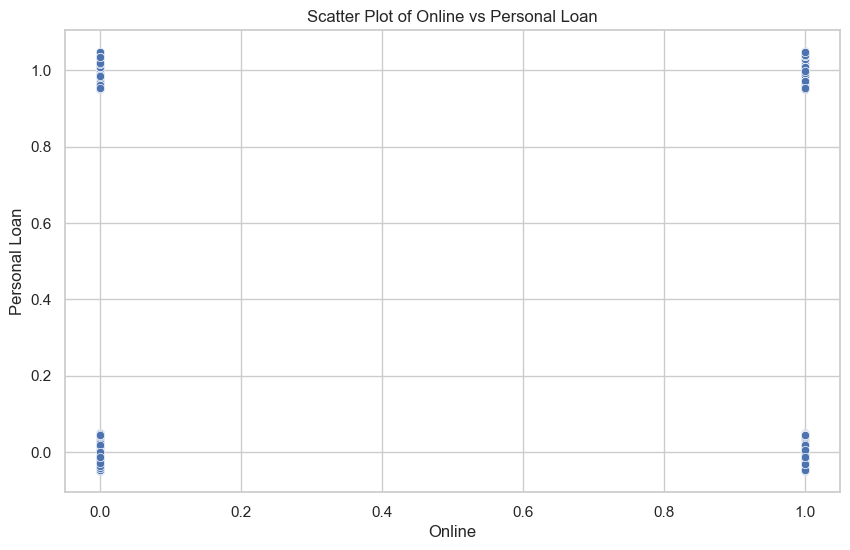

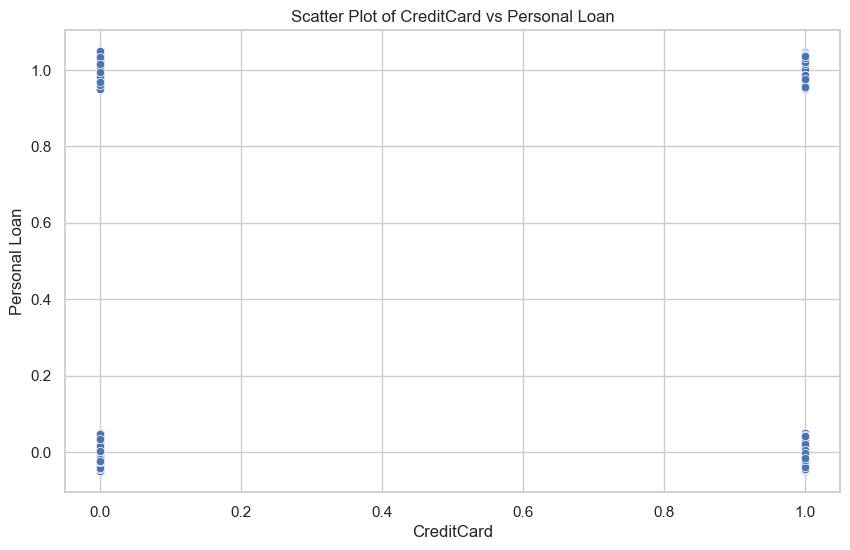

In [50]:
# Type 4: Scatter Plot (for continuous features vs target; adding jitter for binary target)
for feature in features:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df[target] + np.random.uniform(-0.05, 0.05, size=len(df)))
    plt.title(f'Scatter Plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


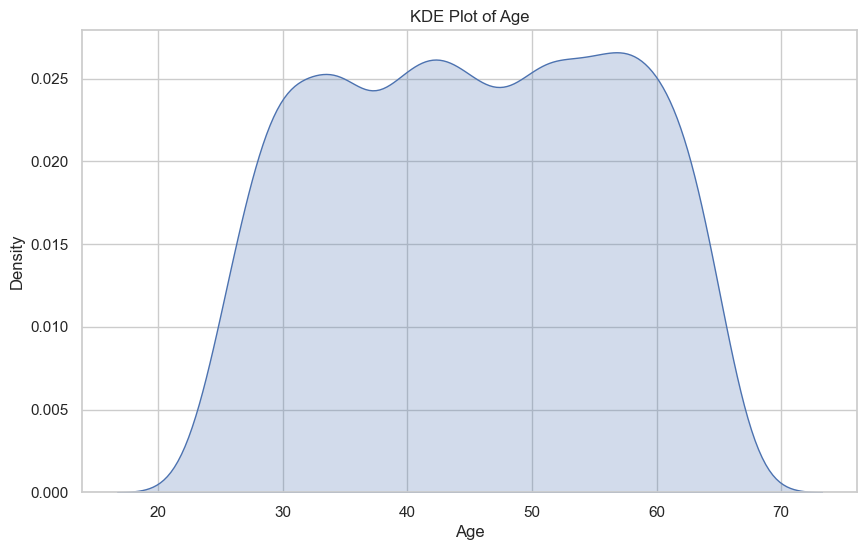

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


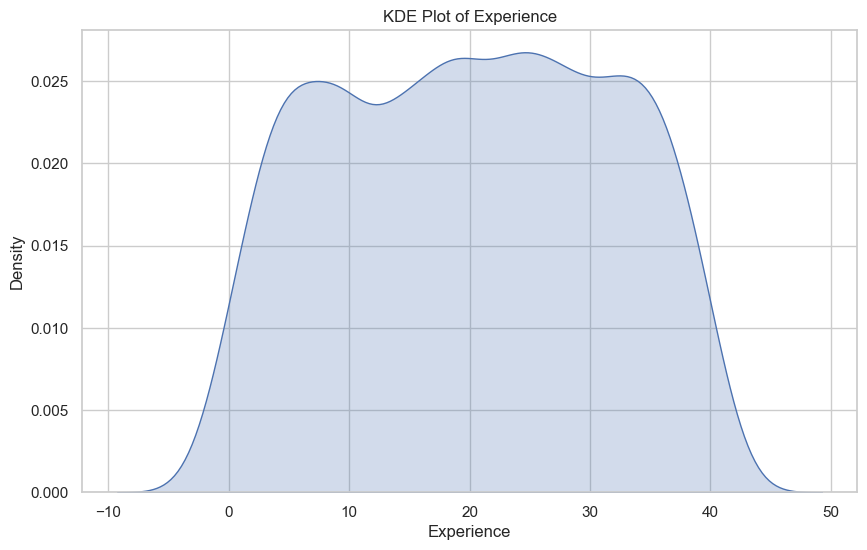

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


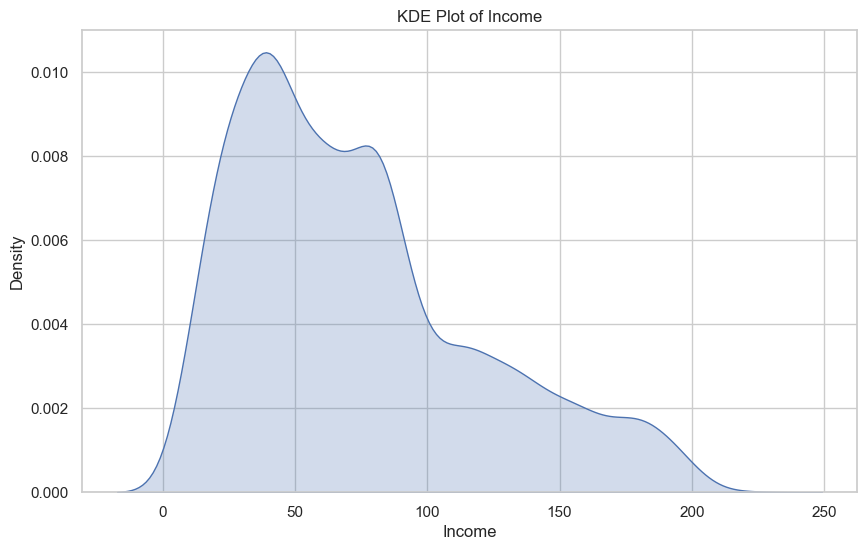

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


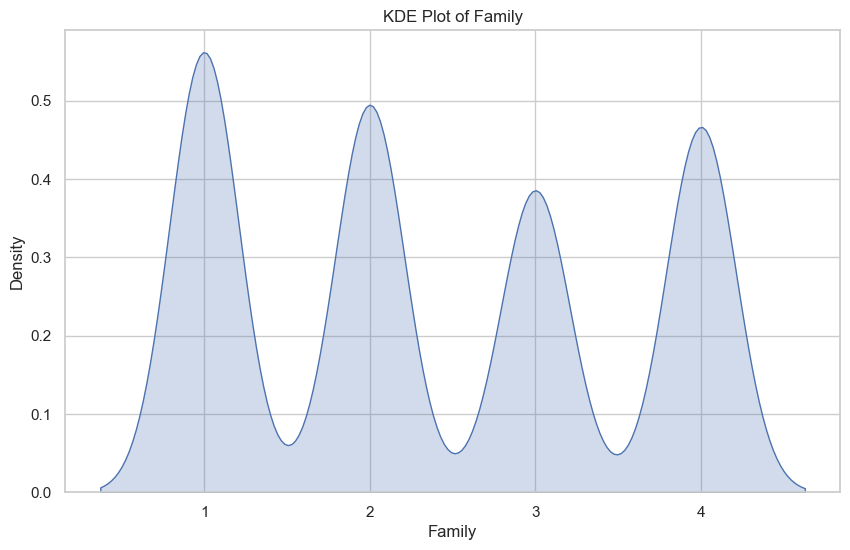

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


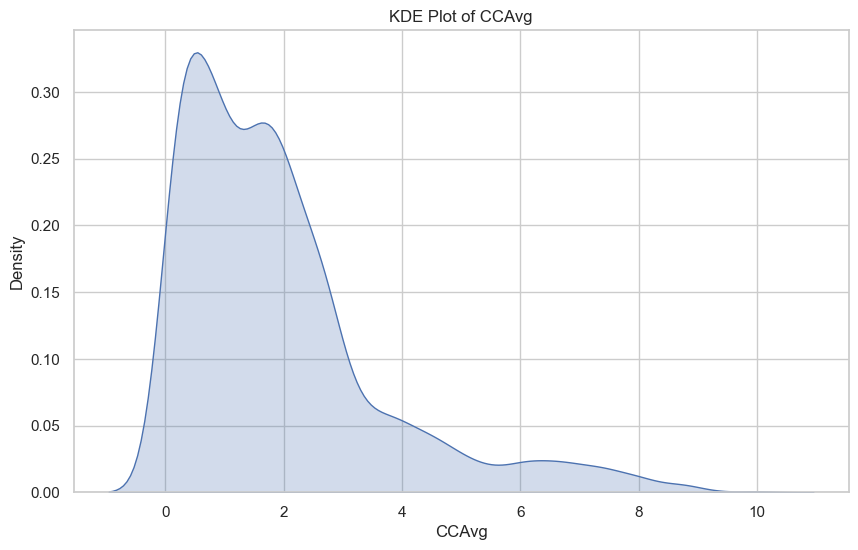

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


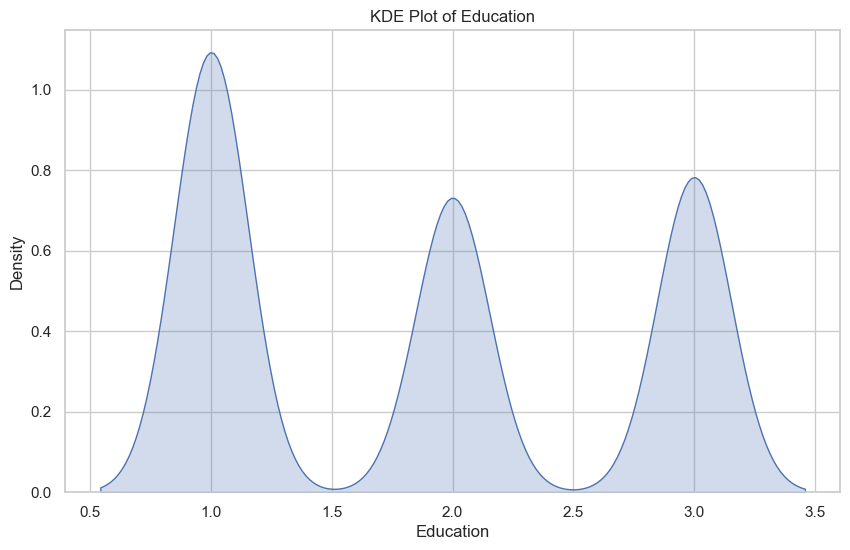

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


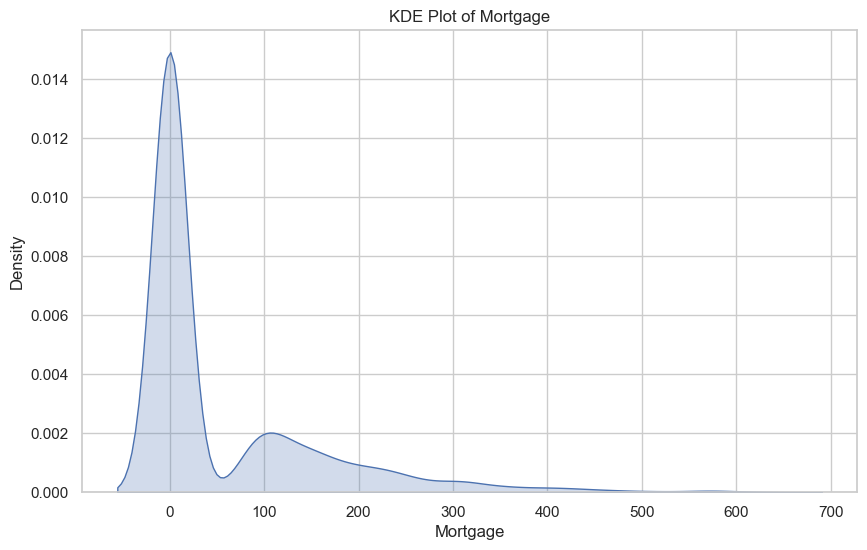

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


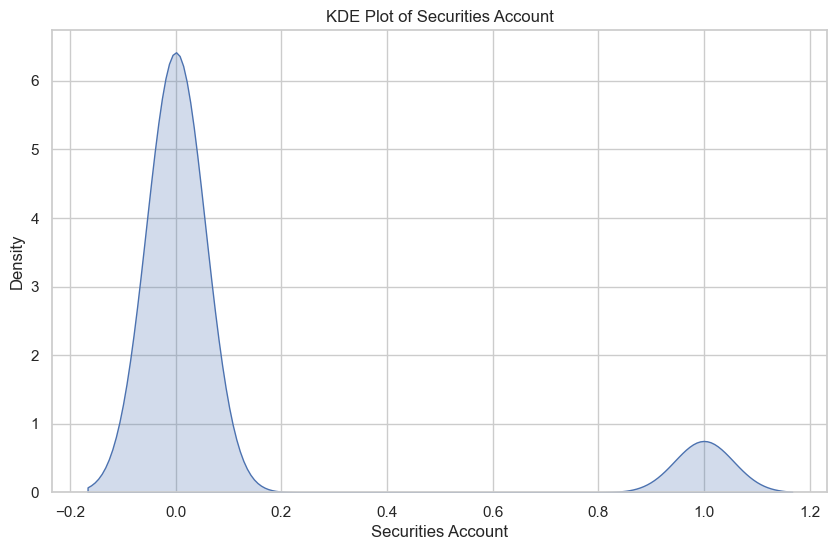

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


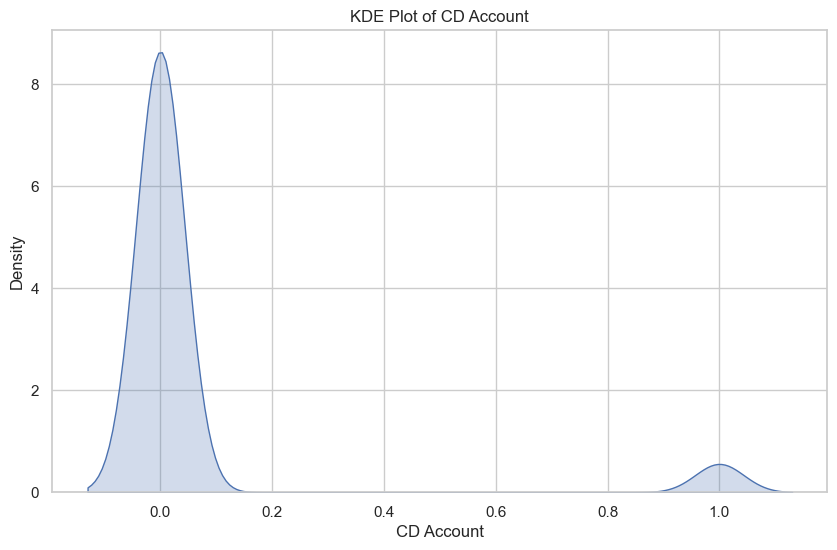

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


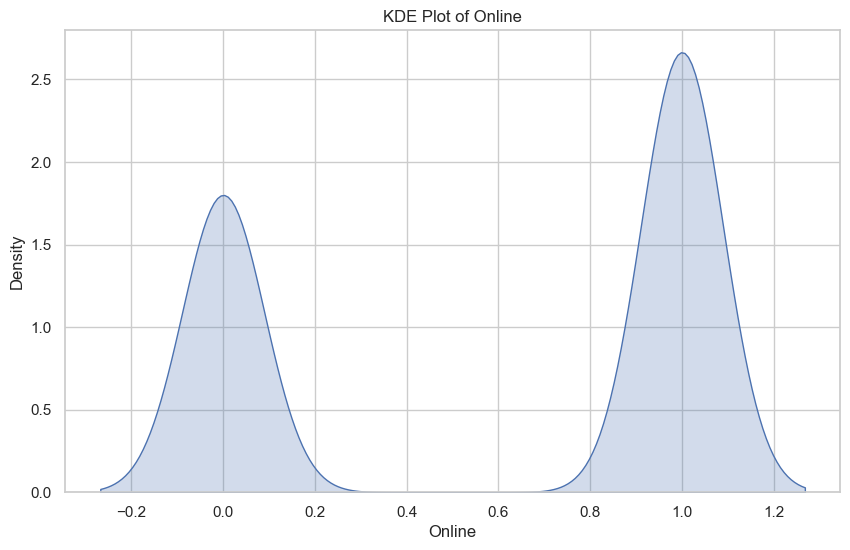

C:\Users\seyedali\AppData\Local\Temp\ipykernel_14928\2608120211.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


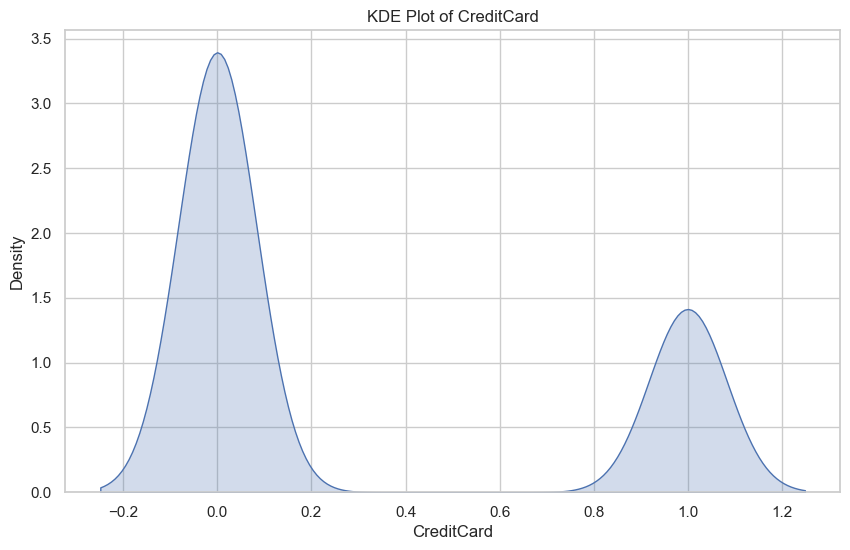

In [52]:
# Type 5: KDE Plot to check the density distribution of features
for feature in features:
    plt.figure()
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

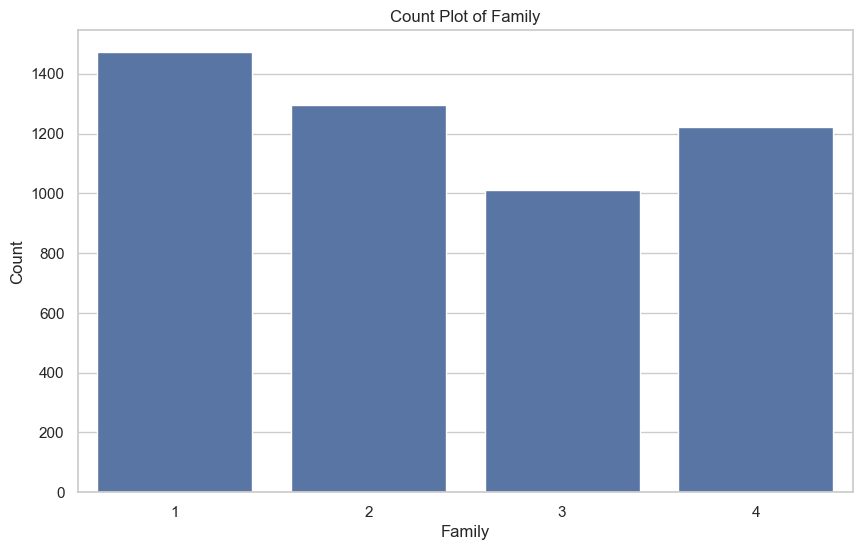

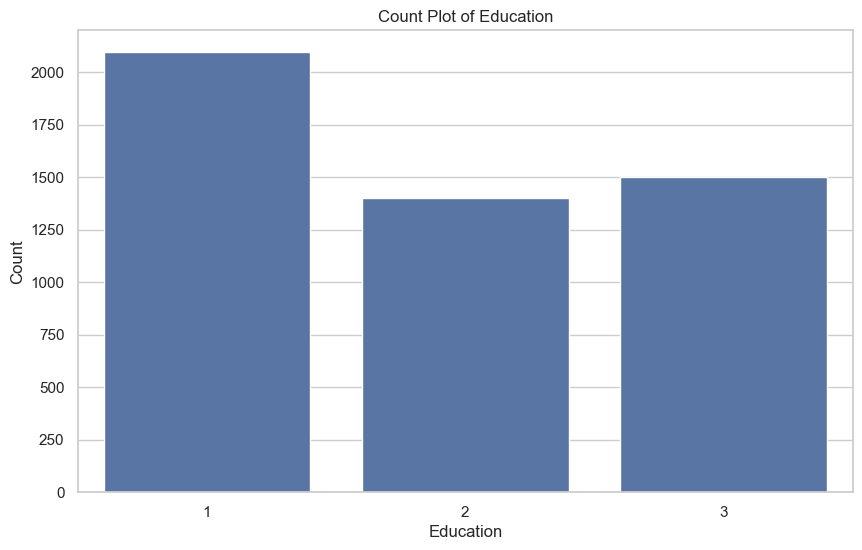

In [56]:
# Type 6: Count Plot for discrete features (such as family, education)
discrete_features = ['Family', 'Education']
for feature in discrete_features:
    plt.figure()
    sns.countplot(x=df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


#### 1. Distribution of Family Size
- The bar plot represents the count of customers for different family sizes.
- The distribution shows that most customers belong to families of size 1, 2, or 3, with fewer customers having a family size of 4.

#### 2. Distribution of Education Levels
- This bar plot illustrates the distribution of education levels among customers.
- We observe that a significant number of customers have undergraduate education (level 1), while fewer have professional-level education (level 3).
- This insight helps in understanding the demographic structure of the dataset.

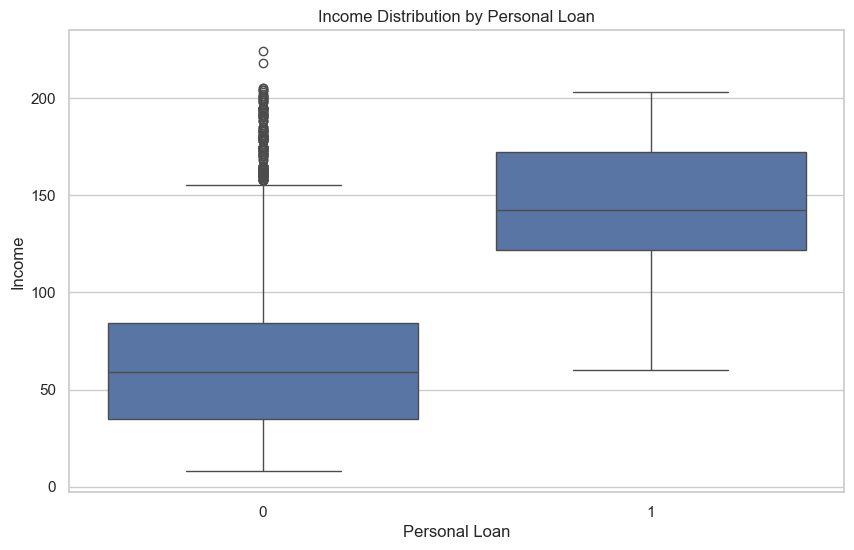

In [67]:
# Additionally, a special plot for the 'income' feature as an example
plt.figure()
sns.boxplot(x=df[target], y=df['Income'])
plt.title('Income Distribution by Personal Loan')
plt.xlabel(target)
plt.ylabel('Income')
plt.show()

#### 3. Income Distribution by Personal Loan Acceptance
- This box plot shows the distribution of income based on whether the customer accepted a personal loan (1) or not (0).
- Customers who accepted the personal loan tend to have higher incomes compared to those who did not.
- There are outliers in the income distribution, indicating some very high-income individuals in the dataset.
- This visualization helps in understanding the relationship between income levels and loan acceptance.

# 4. Data Preprocessing

In [73]:
# Drop identifier columns like Id and zip_code
df_model = df.drop(['ID', 'ZIP Code'], axis=1)

In [75]:
# Check again for missing values in df_model
if df_model.isnull().sum().sum() > 0:
    # For example, fill missing values with the median
    df_model.fillna(df_model.median(), inplace=True)

In [77]:
# Split data into features and target
X = df_model.drop([target], axis=1)
y = df_model[target]

In [79]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [81]:
# Normalize the data (beneficial for models such as Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modeling

In [86]:
# Dictionary to store model results
model_results = {}

# 5.1. Logistic Regression with Polynomial Feature Selection via Loop

In [89]:
print("\n### Logistic Regression with Polynomial Feature Selection ###")
# First, the base model with the original data
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
base_accuracy = accuracy_score(y_test, y_pred)
base_cost = log_loss(y_test, logreg.predict_proba(X_test_scaled))
print(f"Base Accuracy: {base_accuracy:.4f}")
print(f"Base Cost (Log Loss): {base_cost:.4f}")


### Logistic Regression with Polynomial Feature Selection ###
Base Accuracy: 0.9550
Base Cost (Log Loss): 0.1243


In [92]:
# Create a DataFrame version of the normalized training data (to add new columns)
X_train_poly = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_poly  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [94]:
# Loop over each feature to add a second-degree term
selected_poly_features = []  # List of features where adding the square term is beneficial
for feature in X_train.columns:
    # Create the square of the feature
    poly_feature_train = X_train_poly[feature] ** 2
    poly_feature_test = X_test_poly[feature] ** 2

    # Temporarily add this feature to the current data
    X_train_temp = X_train_poly.copy()
    X_test_temp = X_test_poly.copy()
    col_name = feature + '_sq'
    X_train_temp[col_name] = poly_feature_train
    X_test_temp[col_name] = poly_feature_test

    # Train a model with the extended features
    model_temp = LogisticRegression(max_iter=1000, random_state=42)
    model_temp.fit(X_train_temp, y_train)
    y_pred_temp = model_temp.predict(X_test_temp)
    temp_accuracy = accuracy_score(y_test, y_pred_temp)
    print(f"Adding {col_name}: Accuracy = {temp_accuracy:.4f}")

    # If there is a significant improvement (e.g., more than 0.5% increase), accept the feature
    if temp_accuracy > base_accuracy + 0.005:
        selected_poly_features.append(col_name)
        X_train_poly = X_train_temp.copy()
        X_test_poly = X_test_temp.copy()
        base_accuracy = temp_accuracy  # Update base accuracy
        print(f"--> {col_name} accepted. New base accuracy: {base_accuracy:.4f}")
    else:
        print(f"--> {col_name} rejected.")

Adding Age_sq: Accuracy = 0.9530
--> Age_sq rejected.
Adding Experience_sq: Accuracy = 0.9530
--> Experience_sq rejected.
Adding Income_sq: Accuracy = 0.9620
--> Income_sq accepted. New base accuracy: 0.9620
Adding Family_sq: Accuracy = 0.9620
--> Family_sq rejected.
Adding CCAvg_sq: Accuracy = 0.9650
--> CCAvg_sq rejected.
Adding Education_sq: Accuracy = 0.9700
--> Education_sq accepted. New base accuracy: 0.9700
Adding Mortgage_sq: Accuracy = 0.9700
--> Mortgage_sq rejected.
Adding Securities Account_sq: Accuracy = 0.9700
--> Securities Account_sq rejected.
Adding CD Account_sq: Accuracy = 0.9700
--> CD Account_sq rejected.
Adding Online_sq: Accuracy = 0.9700
--> Online_sq rejected.
Adding CreditCard_sq: Accuracy = 0.9700
--> CreditCard_sq rejected.


In [96]:
# Train the final Logistic Regression model with the selected features
final_logreg = LogisticRegression(max_iter=1000, random_state=42)
final_logreg.fit(X_train_poly, y_train)
y_pred_logreg = final_logreg.predict(X_test_poly)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
cost_logreg = log_loss(y_test, final_logreg.predict_proba(X_test_poly))
print(f"\nFinal Logistic Regression Accuracy: {acc_logreg:.4f}")
print(f"Final Logistic Regression Cost (Log Loss): {cost_logreg:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
model_results['Logistic Regression'] = {'accuracy': acc_logreg, 'cost': cost_logreg}


Final Logistic Regression Accuracy: 0.9700
Final Logistic Regression Cost (Log Loss): 0.0948
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       904
           1       0.90      0.77      0.83        96

    accuracy                           0.97      1000
   macro avg       0.94      0.88      0.91      1000
weighted avg       0.97      0.97      0.97      1000



# 5.2. KNN Model with Best k Selection

In [99]:
print("\n### K-Nearest Neighbors (KNN) Model ###")
# For KNN, we use the initially normalized data
best_k = None
best_acc = 0
k_range = range(1, 31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_knn)
    print(f"k = {k}: Accuracy = {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k


### K-Nearest Neighbors (KNN) Model ###
k = 1: Accuracy = 0.9580
k = 2: Accuracy = 0.9550
k = 3: Accuracy = 0.9630
k = 4: Accuracy = 0.9560
k = 5: Accuracy = 0.9600
k = 6: Accuracy = 0.9490
k = 7: Accuracy = 0.9550
k = 8: Accuracy = 0.9470
k = 9: Accuracy = 0.9510
k = 10: Accuracy = 0.9490
k = 11: Accuracy = 0.9520
k = 12: Accuracy = 0.9500
k = 13: Accuracy = 0.9530
k = 14: Accuracy = 0.9480
k = 15: Accuracy = 0.9490
k = 16: Accuracy = 0.9450
k = 17: Accuracy = 0.9440
k = 18: Accuracy = 0.9440
k = 19: Accuracy = 0.9460
k = 20: Accuracy = 0.9440
k = 21: Accuracy = 0.9430
k = 22: Accuracy = 0.9420
k = 23: Accuracy = 0.9420
k = 24: Accuracy = 0.9400
k = 25: Accuracy = 0.9410
k = 26: Accuracy = 0.9400
k = 27: Accuracy = 0.9420
k = 28: Accuracy = 0.9390
k = 29: Accuracy = 0.9400
k = 30: Accuracy = 0.9390


In [101]:
print(f"\nBest k: {best_k} with Accuracy: {best_acc:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_knn_final = final_knn.predict(X_test_scaled)
cost_knn = 1 - best_acc  # For KNN, a cost function is not typically defined; we consider error rate.
print("Classification Report:\n", classification_report(y_test, y_pred_knn_final))
model_results['KNN'] = {'accuracy': best_acc, 'cost': cost_knn}


Best k: 3 with Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       904
           1       0.94      0.66      0.77        96

    accuracy                           0.96      1000
   macro avg       0.95      0.83      0.88      1000
weighted avg       0.96      0.96      0.96      1000



# 5.3. Naive Bayes (GaussianNB) Model

In [106]:

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
acc_nb = accuracy_score(y_test, y_pred_nb)
cost_nb = log_loss(y_test, nb.predict_proba(X_test_scaled))

In [108]:
print("\n### Naive Bayes (GaussianNB) Model ###")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(f"Naive Bayes Cost (Log Loss): {cost_nb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
model_results['Naive Bayes'] = {'accuracy': acc_nb, 'cost': cost_nb}


### Naive Bayes (GaussianNB) Model ###
Naive Bayes Accuracy: 0.8780
Naive Bayes Cost (Log Loss): 0.5137
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       904
           1       0.40      0.55      0.46        96

    accuracy                           0.88      1000
   macro avg       0.68      0.73      0.70      1000
weighted avg       0.90      0.88      0.89      1000



# 6. Compare Models

In [111]:
# Display model results as a table
results_df = pd.DataFrame(model_results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                     accuracy      cost
Logistic Regression     0.970  0.094829
KNN                     0.963  0.037000
Naive Bayes             0.878  0.513723


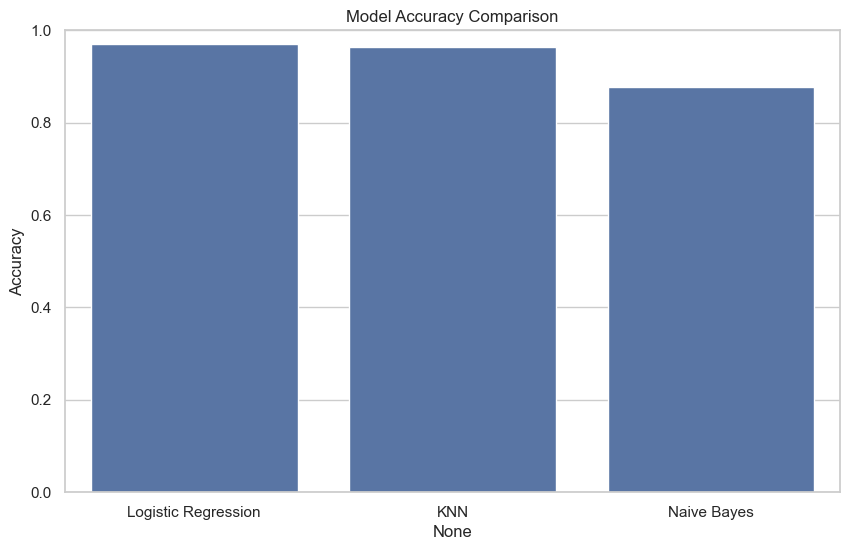

In [113]:
# Plot a comparison of model accuracies
plt.figure()
sns.barplot(x=results_df.index, y='accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# Additional Plots for Model Comparison

# 6.1 Plot ROC Curves for all models


In [119]:
plt.figure()
model_names = list(model_results.keys())
colors = ['blue', 'green', 'red']

<Figure size 1000x600 with 0 Axes>

In [121]:
# For Logistic Regression, use polynomial features data
fpr_dict, tpr_dict, roc_auc_dict = {}, {}, {}

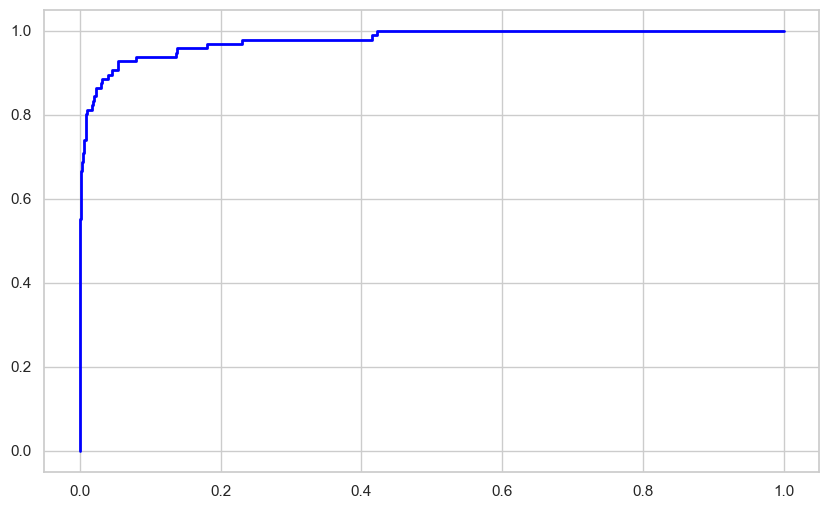

In [123]:
# Logistic Regression ROC
fpr, tpr, _ = roc_curve(y_test, final_logreg.predict_proba(X_test_poly)[:, 1])
roc_auc = auc(fpr, tpr)
fpr_dict['Logistic Regression'] = fpr
tpr_dict['Logistic Regression'] = tpr
roc_auc_dict['Logistic Regression'] = roc_auc
plt.plot(fpr, tpr, color=colors[0], lw=2,
         label='Logistic Regression (AUC = %0.2f)' % roc_auc)

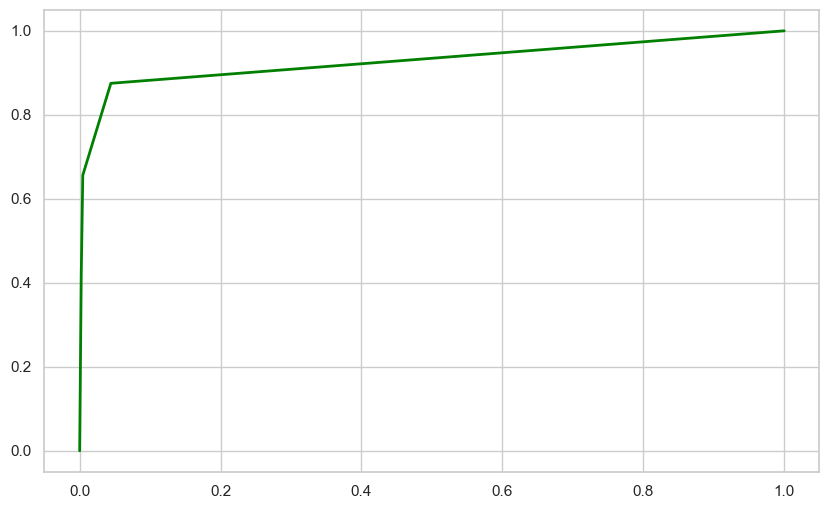

In [125]:
# KNN ROC
fpr, tpr, _ = roc_curve(y_test, final_knn.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
fpr_dict['KNN'] = fpr
tpr_dict['KNN'] = tpr
roc_auc_dict['KNN'] = roc_auc
plt.plot(fpr, tpr, color=colors[1], lw=2,
         label='KNN (AUC = %0.2f)' % roc_auc)

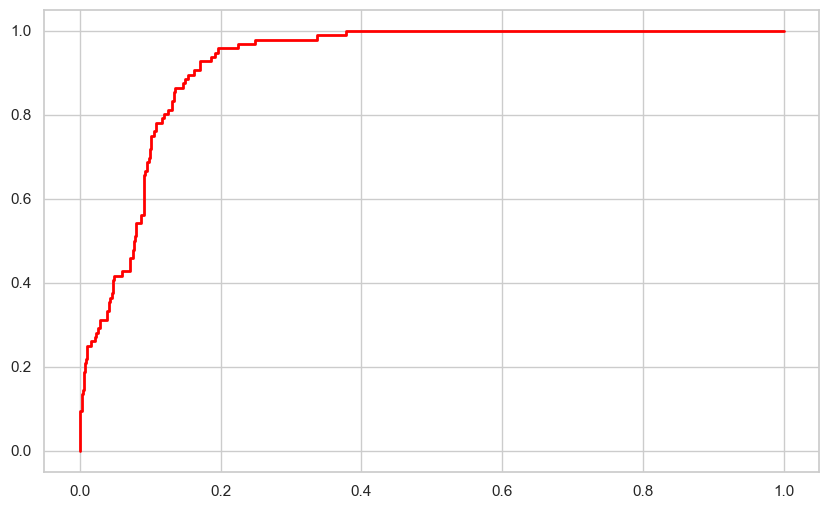

In [127]:
# Naive Bayes ROC
fpr, tpr, _ = roc_curve(y_test, nb.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
fpr_dict['Naive Bayes'] = fpr
tpr_dict['Naive Bayes'] = tpr
roc_auc_dict['Naive Bayes'] = roc_auc
plt.plot(fpr, tpr, color=colors[2], lw=2,
         label='Naive Bayes (AUC = %0.2f)' % roc_auc)

# 6.2 Plot Confusion Matrices for each model


In [136]:
models_and_preds = {
    'Logistic Regression': (final_logreg, X_test_poly if 'Logistic Regression' in model_results else None),
    'KNN': (final_knn, X_test_scaled),
    'Naive Bayes': (nb, X_test_scaled)
}

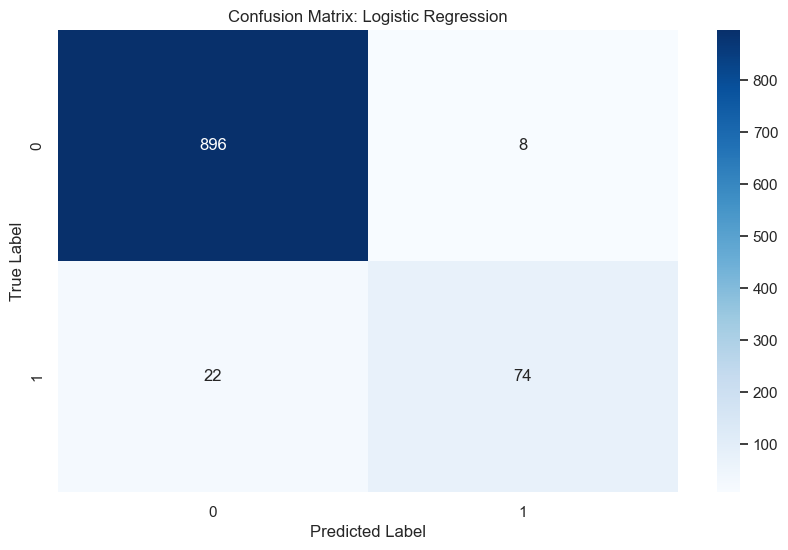

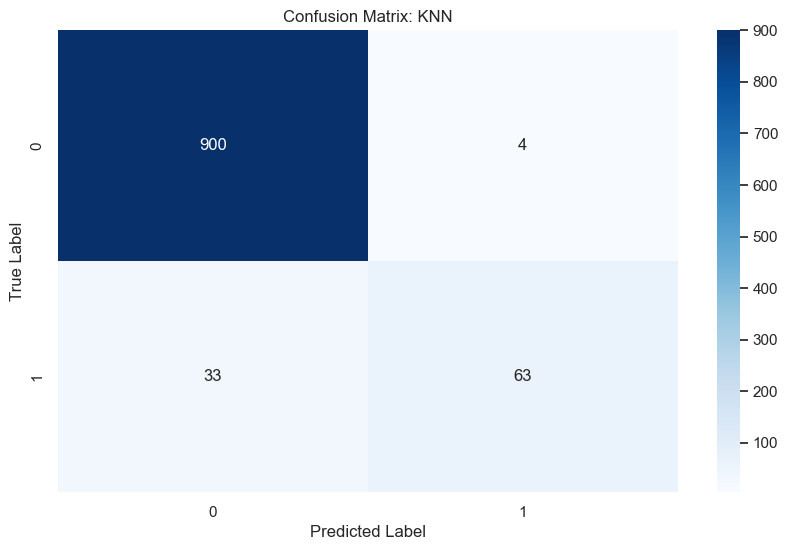

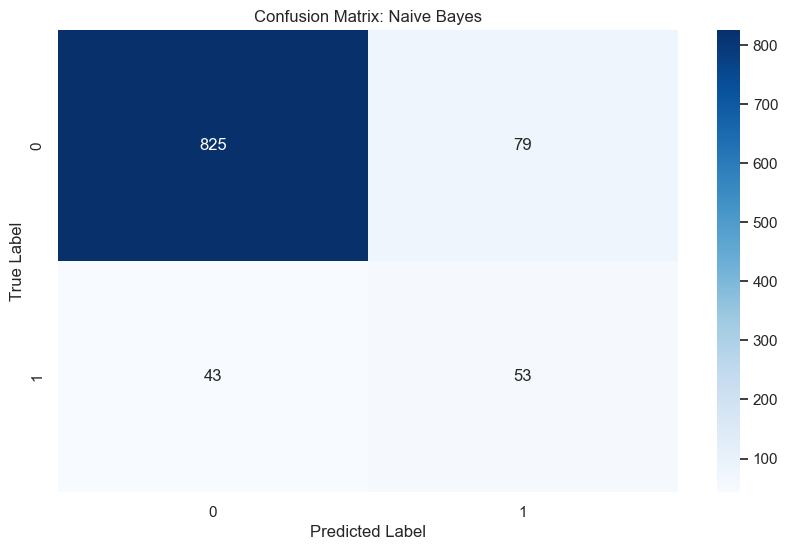

In [138]:
for model_name, (model_obj, X_data) in models_and_preds.items():
    if model_name == 'Logistic Regression':
        y_pred_cm = model_obj.predict(X_test_poly)
    else:
        y_pred_cm = model_obj.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_cm)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# 7. Prediction for a New Sample

In [153]:
new_data = {
    'Age': 42,
    'Experience': 16,
    'Income': 30,
    'Family': 3,
    'CCAvg': 0.5,         
    'Education': 3,
    'Mortgage': 0,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1  
}


In [155]:
new_df = pd.DataFrame([new_data])

In [157]:
# No need to drop extra columns here
# Normalize the new sample
new_scaled = scaler.transform(new_df)

In [159]:
# For Logistic Regression, if using polynomial features, perform the same transformation
new_poly = pd.DataFrame(new_scaled, columns=new_df.columns)
# Add the square features that were selected
for feat in selected_poly_features:
    base_feat = feat.replace('_sq', '')
    new_poly[feat] = new_poly[base_feat] ** 2

In [161]:
# Predict with the best performing model (we assume the one with highest accuracy)
best_model_name = results_df['accuracy'].idxmax()
print(f"\nBest performing model: {best_model_name}")



Best performing model: Logistic Regression


In [163]:
if best_model_name == 'Logistic Regression':
    prediction = final_logreg.predict(new_poly)
    proba = final_logreg.predict_proba(new_poly)
elif best_model_name == 'KNN':
    prediction = final_knn.predict(new_scaled)
    proba = final_knn.predict_proba(new_scaled)
else:  # Naive Bayes
    prediction = nb.predict(new_scaled)
    proba = nb.predict_proba(new_scaled)

print(f"\nPrediction for the new customer (1 means accepted personal loan, 0 means not accepted): {prediction[0]}")
print(f"Prediction probabilities: {proba[0]}")



Prediction for the new customer (1 means accepted personal loan, 0 means not accepted): 0
Prediction probabilities: [9.99995929e-01 4.07080444e-06]


# Summary for Model Comparison


In [167]:
comparison = f"""
### Model Comparison Summary

- **Accuracy Comparison:**  
  The bar plot above shows the test accuracy of each model:
  - Logistic Regression: {acc_logreg:.4f}
  - KNN (with k={best_k}): {best_acc:.4f}
  - Naive Bayes: {acc_nb:.4f}
  
  The best performing model is **{best_model_name}** based on accuracy.

- **ROC Analysis:**  
  The ROC curves plot compares the models by their AUC scores. A higher AUC indicates better performance in distinguishing between the classes.

- **Confusion Matrices:**  
  The confusion matrices for each model provide insight into the number of correct and incorrect predictions, helping us to understand each model's performance in more detail.

Based on these comparisons, **{best_model_name}** not only achieved the highest accuracy but also shows a favorable balance in terms of ROC AUC and confusion matrix metrics.
"""
print(comparison)



### Model Comparison Summary

- **Accuracy Comparison:**  
  The bar plot above shows the test accuracy of each model:
  - Logistic Regression: 0.9700
  - KNN (with k=3): 0.9630
  - Naive Bayes: 0.8780
  
  The best performing model is **Logistic Regression** based on accuracy.

- **ROC Analysis:**  
  The ROC curves plot compares the models by their AUC scores. A higher AUC indicates better performance in distinguishing between the classes.

- **Confusion Matrices:**  
  The confusion matrices for each model provide insight into the number of correct and incorrect predictions, helping us to understand each model's performance in more detail.

Based on these comparisons, **Logistic Regression** not only achieved the highest accuracy but also shows a favorable balance in terms of ROC AUC and confusion matrix metrics.

